In [2]:
import pandas as pd
import os
from datetime import date
from datetime import time
import time

# API Wrappers

In [1]:
pip install pycoingecko

Note: you may need to restart the kernel to use updated packages.


In [86]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [20]:
pd.options.display.max_columns=30

# Extração dos Dados

## Lista das Moedas por Plataforma - get_coins_list

In [88]:
coin_assetplatform = cg.get_coins_list(include_platform=True)
coin_assetplatform_df = pd.DataFrame(coin_assetplatform)
coin_assetplatform_df

,id,symbol,name,platforms
0,01coin,zoc,01coin,{}
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,{'ethereum': ''}
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token,{'ethereum': ''}
3,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx Token Token,{'ethereum': ''}
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token,{'ethereum': ''}
...,...,...,...,...
13411,zynecoin,zyn,Zynecoin,{'ethereum': '0xe65ee7c03bbb3c950cfd4895c24989...
13412,zyro,zyro,Zyro,{}
13413,zyrri,zyr,Zyrri,{}
13414,zytara-dollar,zusd,Zytara Dollar,{'ethereum': '0xbf0f3ccb8fa385a287106fba22e6bb...


In [89]:
coin_assetplatform_df['platforms']

0                                                       {}
1                                         {'ethereum': ''}
2                                         {'ethereum': ''}
3                                         {'ethereum': ''}
4                                         {'ethereum': ''}
                               ...                        
13411    {'ethereum': '0xe65ee7c03bbb3c950cfd4895c24989...
13412                                                   {}
13413                                                   {}
13414    {'ethereum': '0xbf0f3ccb8fa385a287106fba22e6bb...
13415    {'ethereum': '0xf974b5f9ac9c6632fee8b76c61b024...
Name: platforms, Length: 13416, dtype: object

In [90]:
coin_assetplatform_df['platforms'] =coin_assetplatform_df['platforms'].apply(lambda x: list(x.keys()))

In [100]:
coin_assetplatform_df

,id,symbol,name,platforms
0,01coin,zoc,01coin,[]
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,[ethereum]
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token,[ethereum]
3,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx Token Token,[ethereum]
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token,[ethereum]
...,...,...,...,...
13411,zynecoin,zyn,Zynecoin,[ethereum]
13412,zyro,zyro,Zyro,[]
13413,zyrri,zyr,Zyrri,[]
13414,zytara-dollar,zusd,Zytara Dollar,[ethereum]


In [101]:
coin_assetplatform_df.to_csv('coin_assetplatform_df.csv',index=False, sep=';')

In [93]:
df_platforms =pd.DataFrame()
for index,row in coin_assetplatform_df.iterrows(): 
    df={}
    df['id']= row['id']
    df['symbol']=row['symbol']
    df['name']=row['name']
    for item in row['platforms']:
        if item is not None:
            df['platforms']=item
            df = pd.DataFrame(df, index=[0])
            df_platforms = df_platforms.append(df) 
 

In [94]:
df_platforms

,id,symbol,name,platforms
0,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,ethereum
0,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token,ethereum
0,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx Token Token,ethereum
0,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token,ethereum
0,0-5x-long-bitcoin-token,half,0.5X Long Bitcoin Token,ethereum
...,...,...,...,...
0,zynecoin,zyn,Zynecoin,ethereum
0,zytara-dollar,zusd,Zytara Dollar,ethereum
0,zyx,zyx,ZYX,ethereum
0,zyx,zyx,ZYX,arbitrum-one


In [95]:
coin_x_assetplatform_df = df_platforms

In [102]:
coin_x_assetplatform_df[coin_x_assetplatform_df['id']=='maker']

,id,symbol,name,platforms
0,maker,mkr,Maker,ethereum
0,maker,mkr,Maker,energi
0,maker,mkr,Maker,sora
0,maker,mkr,Maker,arbitrum-one
0,maker,mkr,Maker,avalanche


In [97]:
coin_x_assetplatform_df.to_csv('coin_x_assetplatform_df.csv',index=False, sep=';')

## Lista das Categorias - get_coins_categories_list

In [105]:
url = 'https://api.coingecko.com/api/v3/coins/categories/list'
categories_list_df = pd.read_json(url)
categories_list_df
categories_list_df.to_csv('categories_list_df.csv',index=False, sep=';')

In [106]:
categories_list_df

,category_id,name
0,aave-tokens,Aave Tokens
1,analytics,Analytics
2,arbitrum-ecosystem,Arbitrum Ecosystem
3,artificial-intelligence,Artificial Intelligence
4,asset-backed-tokens,Asset-backed Tokens
...,...,...
133,wrapped-tokens,Wrapped-Tokens
134,yearn-yfi-partnerships-mergers,Yearn Ecosystem
135,yield-aggregator,Yield Aggregator
136,yield-farming,Yield Farming


In [107]:
categories_list_df[categories_list_df['category_id']=='ethereum-ecosystem']

,category_id,name
38,ethereum-ecosystem,Ethereum Ecosystem


In [43]:
cg.get_coins_categories_list()

[{'category_id': 'aave-tokens', 'name': 'Aave Tokens'},
 {'category_id': 'analytics', 'name': 'Analytics'},
 {'category_id': 'arbitrum-ecosystem', 'name': 'Arbitrum Ecosystem'},
 {'category_id': 'artificial-intelligence', 'name': 'Artificial Intelligence'},
 {'category_id': 'asset-backed-tokens', 'name': 'Asset-backed Tokens'},
 {'category_id': 'asset-manager', 'name': 'Asset Manager'},
 {'category_id': 'augmented-reality', 'name': 'Augmented Reality'},
 {'category_id': 'automated-market-maker-amm',
  'name': 'Automated Market Maker (AMM)'},
 {'category_id': 'avalanche-ecosystem', 'name': 'Avalanche Ecosystem'},
 {'category_id': 'axie-infinity', 'name': 'Axie Infinity'},
 {'category_id': 'big-data', 'name': 'Big Data'},
 {'category_id': 'binance-launchpool', 'name': 'Binance Launchpool'},
 {'category_id': 'binance-smart-chain', 'name': 'BNB Chain Ecosystem'},
 {'category_id': 'business-platform', 'name': 'Business Platform'},
 {'category_id': 'business-services', 'name': 'Business Serv

In [279]:
coins_categories_list_df.shape

(138, 2)

## Lista das Categorias - get_coins_categories

In [108]:
url1 = 'https://api.coingecko.com/api/v3/coins/categories'
categories_df = pd.read_json(url1)
categories_df.to_csv('categories_df.csv',index=False, sep='|')

In [109]:
categories_df

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,ethereum-ecosystem,Ethereum Ecosystem,5.302873e+11,-0.481066,,[https://assets.coingecko.com/coins/images/279...,9.452304e+10,2022-05-17 18:05:52.141000+00:00
1,smart-contract-platform,Smart Contract Platform,4.151872e+11,-1.133682,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,2.813368e+10,2022-05-17 18:05:38.125000+00:00
2,binance-smart-chain,BNB Chain Ecosystem,2.642592e+11,-0.087775,BNB Chain is an alternative blockchain that is...,[https://assets.coingecko.com/coins/images/325...,6.993189e+10,2022-05-17 18:05:49.301000+00:00
3,polygon-ecosystem,Polygon Ecosystem,2.558474e+11,1.090975,,[https://assets.coingecko.com/coins/images/325...,6.765128e+10,2022-05-17 18:05:22.118000+00:00
4,avalanche-ecosystem,Avalanche Ecosystem,2.408255e+11,1.013578,None,[https://assets.coingecko.com/coins/images/325...,6.548695e+10,2022-05-17 18:05:13.844000+00:00
...,...,...,...,...,...,...,...,...
70,tourism,Tourism,1.151437e+08,2.246297,None,[https://assets.coingecko.com/coins/images/465...,3.721292e+06,2022-05-17 18:05:44.913000+00:00
71,kardiachain-ecosystem,KardiaChain Ecosystem,6.178816e+07,5.719633,,[https://assets.coingecko.com/coins/images/794...,1.839113e+09,2022-05-17 18:05:44.314000+00:00
72,farming-as-a-service-faas,Farming-as-a-Service (FaaS),2.352493e+07,0.101872,,[https://assets.coingecko.com/coins/images/215...,2.240075e+05,2022-05-17 18:05:47.784000+00:00
73,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,2.181006e+04,2022-05-17 18:05:34.597000+00:00


In [112]:
categories_df['top_3_coins'][1]

['https://assets.coingecko.com/coins/images/279/small/ethereum.png?1595348880',
 'https://assets.coingecko.com/coins/images/825/small/bnb-icon2_2x.png?1644979850',
 'https://assets.coingecko.com/coins/images/975/small/cardano.png?1547034860']

In [116]:
coin_assetplatform_df[coin_assetplatform_df['id']=='ethereum']

,id,symbol,name,platforms
4308,ethereum,eth,Ethereum,[]


In [113]:
df_categories_aux =pd.DataFrame()
for index,row in categories_df.iterrows(): 
    df={}
    df['id']= row['id']
    df['name']=row['name']
    df = pd.DataFrame(df, index=[0])
    df_categories_aux = df_categories_aux.append(df) 
 

In [115]:
df_categories_aux
df_categories_aux.to_csv('df_categories_aux.csv',index=False, sep=';')

In [ ]:
categories_top3_coin_df = pd.read_csv(r'C:\Users\patri\Downloads\Jupyter\Ironhack\Projeto Final\Planilhas\Auxiliar\auxiliar_categorias_top3.csv')

In [ ]:
categories_top3_coin_df

In [ ]:
categories_top10_metaverse_df = pd.read_csv(r'C:\Users\patri\Downloads\Jupyter\Ironhack\Projeto Final\Planilhas\Auxiliar\auxiliar_categorias_metaverse_top10.csv')

In [ ]:
categories_top10_metaverse_df

In [52]:
coins_categories_df[coins_categories_df['id']=='ethereum-ecosystem']

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,ethereum-ecosystem,Ethereum Ecosystem,5.285389e+11,-0.809196,,[https://assets.coingecko.com/coins/images/279...,1.185899e+11,2022-05-17 02:01:10.621000+00:00


In [44]:
cg.get_coins_categories()

[{'id': 'ethereum-ecosystem',
  'name': 'Ethereum Ecosystem',
  'market_cap': 536468444019.3369,
  'market_cap_change_24h': 0.678950042360357,
  'content': '',
  'top_3_coins': ['https://assets.coingecko.com/coins/images/279/small/ethereum.png?1595348880',
   'https://assets.coingecko.com/coins/images/325/small/Tether-logo.png?1598003707',
   'https://assets.coingecko.com/coins/images/6319/small/USD_Coin_icon.png?1547042389'],
  'volume_24h': 103679162690.80841,
  'updated_at': '2022-05-17T10:36:05.095Z'},
 {'id': 'smart-contract-platform',
  'name': 'Smart Contract Platform',
  'market_cap': 422956005398.4416,
  'market_cap_change_24h': 0.7162705723027609,
  'content': 'Smart contract platforms are usually blockchains that host smart contracts or decentralized applications. Users can interact with different smart contracts on these platforms to perform various actions such as lending and borrowing funds, staking their assets or minting NFTs.\r\n\r\nSmart contracts are programs that ar

In [117]:
cg.get_coin_market_chart_by_id()

TypeError: get_coin_market_chart_by_id() missing 3 required positional arguments: 'id', 'vs_currency', and 'days'

In [118]:
cg.get_coin_market_chart_range_by_id()

TypeError: get_coin_market_chart_range_by_id() missing 4 required positional arguments: 'id', 'vs_currency', 'from_timestamp', and 'to_timestamp'

In [119]:
cg.get_coin_market_chart_range_by_id(id='Ethereum',vs_currency='usd',from_timestamp=)

TypeError: get_coin_market_chart_range_by_id() missing 4 required positional arguments: 'id', 'vs_currency', 'from_timestamp', and 'to_timestamp'

## Lista das Blockchains - get_asset_platforms

In [14]:
url2 = 'https://api.coingecko.com/api/v3/asset_platforms'
asset_platforms_df = pd.read_json(url2)
asset_platforms_df.to_csv('asset_platforms_df.csv',index=False, sep=';')
asset_platforms_df

,id,chain_identifier,name,shortname
0,factom,NaN,Factom,
1,openledger,NaN,OpenLedger,
2,cosmos,NaN,Cosmos,
3,binancecoin,NaN,Binance Coin,
4,metaverse-etp,NaN,Metaverse ETP,
...,...,...,...,...
101,optimistic-ethereum,10.0,Optimistic Ethereum,Optimistic Ethereum
102,defi-kingdoms-blockchain,NaN,DFK Chain,DFK Chain
103,evmos,9001.0,Evmos,evmos
104,,NaN,Energi,


In [45]:
cg.get_asset_platforms()

[{'id': 'factom', 'chain_identifier': None, 'name': 'Factom', 'shortname': ''},
 {'id': 'openledger',
  'chain_identifier': None,
  'name': 'OpenLedger',
  'shortname': ''},
 {'id': 'cosmos', 'chain_identifier': None, 'name': 'Cosmos', 'shortname': ''},
 {'id': 'binancecoin',
  'chain_identifier': None,
  'name': 'Binance Coin',
  'shortname': ''},
 {'id': 'metaverse-etp',
  'chain_identifier': None,
  'name': 'Metaverse ETP',
  'shortname': ''},
 {'id': 'nem', 'chain_identifier': None, 'name': 'NEM', 'shortname': ''},
 {'id': 'moonbeam',
  'chain_identifier': 1284,
  'name': 'Moonbeam',
  'shortname': ''},
 {'id': 'icon', 'chain_identifier': None, 'name': 'ICON', 'shortname': ''},
 {'id': 'waves', 'chain_identifier': None, 'name': 'Waves', 'shortname': ''},
 {'id': 'kava', 'chain_identifier': None, 'name': 'Kava', 'shortname': ''},
 {'id': 'stratis',
  'chain_identifier': None,
  'name': 'Stratis',
  'shortname': ''},
 {'id': 'theta', 'chain_identifier': 361, 'name': 'Theta', 'shortna

## Lista das Exchanges - get_exchanges_list

In [15]:
url3 = 'https://api.coingecko.com/api/v3/exchanges'
exchanges_df = pd.read_json(url3)
exchanges_df.to_csv('exchanges_df.csv',index=False, sep=';')
exchanges_df

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,0.0,10,1,592300.867478,592300.867478
1,ftx_spot,FTX,2019.0,Antigua and Barbuda,,https://ftx.com/,https://assets.coingecko.com/markets/images/45...,0.0,10,2,91523.813069,91523.813069
2,gdax,Coinbase Exchange,2012.0,United States,,https://www.coinbase.com,https://assets.coingecko.com/markets/images/23...,0.0,10,3,72332.024580,72332.024580
3,okex,OKX,2013.0,Belize,,https://www.okx.com,https://assets.coingecko.com/markets/images/96...,0.0,10,4,61741.544909,61741.544909
4,kucoin,KuCoin,2014.0,Seychelles,,https://www.kucoin.com/,https://assets.coingecko.com/markets/images/61...,0.0,10,5,47871.360787,47871.360787
...,...,...,...,...,...,...,...,...,...,...,...,...
95,probit,ProBit Global,2017.0,Seychelles,,https://www.probit.com/,https://assets.coingecko.com/markets/images/37...,0.0,6,96,4731.766693,4731.766693
96,quoine,Liquid,2014.0,Japan,,https://liquid.com,https://assets.coingecko.com/markets/images/40...,0.0,6,97,4197.627855,4197.627855
97,spookyswap,SpookySwap,NaN,None,,https://spookyswap.finance/swap,https://assets.coingecko.com/markets/images/66...,0.0,6,98,4123.232368,4123.232368
98,uniswap_v2,Uniswap (v2),2018.0,None,,https://app.uniswap.org/#/swap?use=V2,https://assets.coingecko.com/markets/images/53...,0.0,6,99,3410.852009,3410.852009


In [59]:
exchanges_df[exchanges_df['name']=='Binance']

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,0.0,10,1,592300.867478,592300.867478


In [23]:
cg.get_exchanges_list()

[{'id': 'binance',
  'name': 'Binance',
  'year_established': 2017,
  'country': 'Cayman Islands',
  'description': '',
  'url': 'https://www.binance.com/',
  'image': 'https://assets.coingecko.com/markets/images/52/small/binance.jpg?1519353250',
  'has_trading_incentive': False,
  'trust_score': 10,
  'trust_score_rank': 1,
  'trade_volume_24h_btc': 596439.5218720101,
  'trade_volume_24h_btc_normalized': 596439.5218720101},
 {'id': 'ftx_spot',
  'name': 'FTX',
  'year_established': 2019,
  'country': 'Antigua and Barbuda',
  'description': '',
  'url': 'https://ftx.com/',
  'image': 'https://assets.coingecko.com/markets/images/451/small/F.png?1609051590',
  'has_trading_incentive': False,
  'trust_score': 10,
  'trust_score_rank': 2,
  'trade_volume_24h_btc': 92112.09099489008,
  'trade_volume_24h_btc_normalized': 92112.09099489008},
 {'id': 'gdax',
  'name': 'Coinbase Exchange',
  'year_established': 2012,
  'country': 'United States',
  'description': '',
  'url': 'https://www.coinb

## Exchanges: id_name_list

In [16]:
url4 = 'https://api.coingecko.com/api/v3/exchanges/list'
exchanges_list_df = pd.read_json(url4)
exchanges_list_df.to_csv('exchanges_list_df.csv',index=False, sep=';')
exchanges_list_df

,id,name
0,1bch,1BCH
1,aave,Aave
2,aax,AAX
3,aax_futures,AAX Futures
4,abcc,ABCC
...,...,...
607,zilswap,ZilSwap
608,zipmex,Zipmex
609,zipswap,ZipSwap
610,zkswap,ZKSwap (v1)


In [56]:
exchanges_list_df[exchanges_list_df['id']=='aave']

,id,name
1,aave,Aave


In [55]:
cg.get_exchanges_id_name_list()

[{'id': '1bch', 'name': '1BCH'},
 {'id': 'aave', 'name': 'Aave'},
 {'id': 'aax', 'name': 'AAX'},
 {'id': 'aax_futures', 'name': 'AAX Futures'},
 {'id': 'abcc', 'name': 'ABCC'},
 {'id': 'acdx', 'name': 'ACDX'},
 {'id': 'acdx_futures', 'name': 'ACDX Futures'},
 {'id': 'acsi_finance', 'name': 'Acsi Finance'},
 {'id': 'aex', 'name': 'AEX'},
 {'id': 'agora_swap', 'name': 'Agora Swap'},
 {'id': 'algebra_finance', 'name': 'Algebra finance'},
 {'id': 'allcoin', 'name': 'Allcoin'},
 {'id': 'alpha_five', 'name': 'Alpha5'},
 {'id': 'altcointrader', 'name': 'AltcoinTrader'},
 {'id': 'alterdice', 'name': 'AlterDice'},
 {'id': 'altmarkets', 'name': 'Altmarkets'},
 {'id': 'anyswap', 'name': 'Anyswap'},
 {'id': 'apeswap', 'name': 'ApeSwap'},
 {'id': 'apeswap_polygon', 'name': 'ApeSwap (Polygon)'},
 {'id': 'aprobit', 'name': 'Aprobit'},
 {'id': 'artisturba', 'name': 'Artis Turba'},
 {'id': 'astroport', 'name': 'Astroport'},
 {'id': 'atomars', 'name': 'Atomars'},
 {'id': 'auroraswap', 'name': 'AuroraSwa

## Exchange Rates

In [17]:
exchange_rates = cg.get_exchange_rates()
exchange_rates_df = pd.DataFrame(exchange_rates)
exchange_rates_df.to_csv('exchange_rates_df.csv',index=False, sep=';')
exchange_rates_df

,rates
aed,"{'name': 'United Arab Emirates Dirham', 'unit'..."
ars,"{'name': 'Argentine Peso', 'unit': '$', 'value..."
aud,"{'name': 'Australian Dollar', 'unit': 'A$', 'v..."
bch,"{'name': 'Bitcoin Cash', 'unit': 'BCH', 'value..."
bdt,"{'name': 'Bangladeshi Taka', 'unit': '৳', 'val..."
...,...
xdr,"{'name': 'IMF Special Drawing Rights', 'unit':..."
xlm,"{'name': 'Lumens', 'unit': 'XLM', 'value': 217..."
xrp,"{'name': 'XRP', 'unit': 'XRP', 'value': 69701...."
yfi,"{'name': 'Yearn.finance', 'unit': 'YFI', 'valu..."


In [54]:
pd.json_normalize(exchange_rates_df['rates'])

,name,unit,value,type
0,United Arab Emirates Dirham,DH,110101.184,fiat
1,Argentine Peso,$,3531742.888,fiat
2,Australian Dollar,A$,42937.063,fiat
3,Bitcoin Cash,BCH,149.470,crypto
4,Bangladeshi Taka,৳,2625052.665,fiat
...,...,...,...,...
56,IMF Special Drawing Rights,XDR,21876.446,fiat
57,Lumens,XLM,218536.301,crypto
58,XRP,XRP,70110.966,crypto
59,Yearn.finance,YFI,3.054,crypto


In [18]:
exchange_rates_df['rates'][1]['name']

'Argentine Peso'

In [64]:
exchange_rates_df

aed     {'name': 'United Arab Emirates Dirham', 'unit'...
ars     {'name': 'Argentine Peso', 'unit': '$', 'value...
aud     {'name': 'Australian Dollar', 'unit': 'A$', 'v...
bch     {'name': 'Bitcoin Cash', 'unit': 'BCH', 'value...
bdt     {'name': 'Bangladeshi Taka', 'unit': '৳', 'val...
                              ...                        
xlm     {'name': 'Lumens', 'unit': 'XLM', 'value': 218...
xrp     {'name': 'XRP', 'unit': 'XRP', 'value': 70110....
yfi     {'name': 'Yearn.finance', 'unit': 'YFI', 'valu...
zar     {'name': 'South African Rand', 'unit': 'R', 'v...
name                          United Arab Emirates Dirham
Name: rates, Length: 62, dtype: object

## Exchanges by id

In [60]:
exchanges_df[exchanges_df['name']=='Binance']

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,0.0,10,1,592300.867478,592300.867478


In [64]:
import time
exchanges_by_id = []
for id in exchanges_df['id']:
    time.sleep(1.5)
    x = cg.get_exchanges_by_id(id=id)
    exchanges_by_id.append(x)

HTTPError: 429 Client Error: Too Many Requests for url: https://api.coingecko.com/api/v3/exchanges/coindeal

In [ ]:
exchanges_by_id

In [226]:
exchanges_by_id_df = pd.DataFrame(exchanges_by_id)
exchanges_by_id_df.shape

,name,year_established,country,description,url,image,facebook_url,reddit_url,telegram_url,slack_url,other_url_1,other_url_2,twitter_handle,has_trading_incentive,centralized,public_notice,alert_notice,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized,tickers,status_updates
0,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,https://www.facebook.com/binanceexchange,https://www.reddit.com/r/binance/,,,https://medium.com/binanceexchange,https://steemit.com/@binanceexchange,binance,False,True,,,10,1,573394.625795,573394.625795,"[{'base': 'BUSD', 'target': 'USDT', 'market': ...",[{'description': 'Juventus and Paris Saint-Ger...
1,FTX,2019.0,Antigua and Barbuda,,https://ftx.com/,https://assets.coingecko.com/markets/images/45...,,,,,,,FTX_official,False,True,,,10,2,84014.590744,84014.590744,"[{'base': 'USDT', 'target': 'USD', 'market': {...",[]
2,Coinbase Exchange,2012.0,United States,,https://www.coinbase.com,https://assets.coingecko.com/markets/images/23...,https://www.facebook.com/coinbase/,,,,,,CoinbasePro,False,True,,,10,3,69608.430471,69608.430471,"[{'base': 'USDT', 'target': 'USD', 'market': {...",[]
3,OKX,2013.0,Belize,,https://www.okx.com,https://assets.coingecko.com/markets/images/96...,https://www.facebook.com/OKExOffical/,,,,,,okx,False,True,OKEx exchange has rebranded to OKX. For detail...,,10,4,60602.112365,60602.112365,"[{'base': 'BTC', 'target': 'USDT', 'market': {...",[]
4,KuCoin,2014.0,Seychelles,,https://www.kucoin.com/,https://assets.coingecko.com/markets/images/61...,https://www.facebook.com/kucoinexchangepage,https://www.reddit.com/r/kucoin,https://t.me/joinchat/FMqUpg1_vED9MSDJPPcFkg,,https://t.me/joinchat/FMqUpg0PI9WjzplzfYahjw,,kucoincom,False,True,,,10,5,51262.575153,51262.575153,"[{'base': 'USDC', 'target': 'USDT', 'market': ...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Catex,2018.0,China,"Established in August 2018, Catex is a central...",https://www.catex.io/,https://assets.coingecko.com/markets/images/35...,,https://www.reddit.com/r/Catex/,https://t.me/catex_group,,https://github.com/catex,https://discordapp.com/invite/4Tsj25s,catexofficial,False,True,,,7,70,1321.682481,1321.682481,"[{'base': 'ETH', 'target': 'BTC', 'market': {'...",[{'description': 'We finally released our Farm...
69,Cryptology,2018.0,Estonia,,https://cryptology.com/,https://assets.coingecko.com/markets/images/28...,https://www.facebook.com/Cryptologyexch,,https://t.me/cryptology_community,,,,Cryptologyexch,False,True,,,7,71,1249.612772,1249.612772,"[{'base': 'BTC', 'target': 'USD', 'market': {'...",[{'description': 'Cryptology is pleased to ann...
70,Poloniex,2014.0,Seychelles,,https://poloniex.com/,https://assets.coingecko.com/markets/images/37...,,,,,,,poloniex,False,True,,,7,72,1165.286380,1165.286380,"[{'base': 'BTC', 'target': 'USDT', 'market': {...",[]
71,eToroX,2019.0,Gibraltar,eToroX is eToro’s professional crypto exchange...,https://www.etorox.com/,https://assets.coingecko.com/markets/images/50...,https://www.facebook.com/eToroX/,https://www.reddit.com/r/eToroX/,https://t.me/eTorox,,https://etorox.github.io/docs/,https://www.linkedin.com/company/etorox,etorox,False,True,,,7,73,681.086050,681.086050,"[{'base': 'BTC', 'target': 'USD', 'market': {'...",[]


In [57]:
exchanges_by_id_df[exchanges_by_id_df['name']=='Binance']

NameError: name 'exchanges_by_id_df' is not defined

In [283]:
exchanges_by_id_df.shape

(73, 23)

In [216]:
#print(exchanges_by_id_df.loc[exchanges_by_id_df['name']=='Dex-Trade','description'][20])
print(exchanges_by_id_df.loc[exchanges_by_id_df['name']=='Gate.io','description'][16])

Gate was established in 2013, and it is the top 10 exchanges in the world in terms of authentic trading volume. It is also the first choice of over 8 million registered customers, covering 130+ countries worldwide, as we are providing the most comprehensive digital asset solutions.


In [185]:
exchanges_by_id_df.to_csv('exchanges_by_id_df.csv',index=False, sep=';')

In [191]:
exchanges_by_id_df.loc[exchanges_by_id_df['name']=='Binance','tickers']

0    [{'base': 'BUSD', 'target': 'USDT', 'market': ...
Name: tickers, dtype: object

In [204]:
pd.json_normalize(exchanges_by_id_df['tickers'][1])

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,market.name,market.identifier,market.has_trading_incentive,converted_last.btc,converted_last.eth,converted_last.usd,converted_volume.btc,converted_volume.eth,converted_volume.usd,target_coin_id
0,USDT,USD,0.99870,2.708997e+08,green,0.010013,2022-05-16T14:21:47+00:00,2022-05-16T14:21:47+00:00,2022-05-16T14:21:47+00:00,False,False,https://ftx.com/trade/USDT/USD,None,tether,FTX,ftx_spot,False,0.000034,0.000494,0.99870,9088.000000,133877.000000,270547521,NaN
1,WBTC,BTC,0.99960,1.884736e+02,green,0.010003,2022-05-16T14:08:38+00:00,2022-05-16T14:08:38+00:00,2022-05-16T14:20:40+00:00,False,False,https://ftx.com/trade/WBTC/BTC,None,wrapped-bitcoin,FTX,ftx_spot,False,0.999600,14.724828,29756.00000,188.398000,2775.000000,5608156,bitcoin
2,WBTC,USD,29699.00000,6.379225e+01,green,0.147959,2022-05-16T14:12:46+00:00,2022-05-16T14:12:46+00:00,2022-05-16T14:20:38+00:00,False,False,https://ftx.com/trade/WBTC/USD,None,wrapped-bitcoin,FTX,ftx_spot,False,0.997697,14.696790,29699.00000,63.645000,937.541000,1894566,NaN
3,BTC,USD,29702.00000,2.674895e+04,green,0.013367,2022-05-16T14:21:46+00:00,2022-05-16T14:21:46+00:00,2022-05-16T14:21:46+00:00,False,False,https://ftx.com/trade/BTC/USD,None,bitcoin,FTX,ftx_spot,False,0.997755,14.697648,29702.00000,26689.000000,393147.000000,794497367,NaN
4,BTC,USDT,29734.00000,4.940039e+03,green,0.016815,2022-05-16T14:21:48+00:00,2022-05-16T14:21:48+00:00,2022-05-16T14:21:48+00:00,False,False,https://ftx.com/trade/BTC/USDT,None,bitcoin,FTX,ftx_spot,False,0.998069,14.702279,29711.00000,4931.000000,72630.000000,146775285,tether
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NEAR,USD,6.68000,1.923562e+05,green,0.314371,2022-05-16T14:20:42+00:00,2022-05-16T14:20:42+00:00,2022-05-16T14:20:42+00:00,False,False,https://ftx.com/trade/NEAR/USD,None,near,FTX,ftx_spot,False,0.000224,0.003306,6.68000,43.165752,635.863000,1284939,NaN
96,GARI,USD,0.73980,5.447097e+04,green,0.390967,2022-05-16T14:16:49+00:00,2022-05-16T14:16:49+00:00,2022-05-16T14:20:41+00:00,False,False,https://ftx.com/trade/GARI/USD,None,gari-network,FTX,ftx_spot,False,0.000025,0.000366,0.73980,1.353743,19.941606,40298,NaN
97,AAVE,USDT,83.80000,4.445867e+03,green,0.250507,2022-05-16T14:20:36+00:00,2022-05-16T14:20:36+00:00,2022-05-16T14:20:36+00:00,False,False,https://ftx.com/trade/AAVE/USDT,None,aave,FTX,ftx_spot,False,0.002821,0.041552,83.97000,12.540865,184.736000,373311,tether
98,WAVES,USD,6.53700,5.583006e+03,green,0.121590,2022-05-16T14:12:44+00:00,2022-05-16T14:12:44+00:00,2022-05-16T14:20:37+00:00,False,False,https://ftx.com/trade/WAVES/USD,None,waves,FTX,ftx_spot,False,0.000220,0.003235,6.54000,1.226036,18.060396,36496,NaN


## Moeda por id - cg.get_coin_by_id

In [22]:
coins_list_df

,id,symbol,name,platforms
0,01coin,zoc,01coin,[]
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,[ethereum]
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token,[ethereum]
3,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx Token Token,[ethereum]
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token,[ethereum]
...,...,...,...,...
13393,zynecoin,zyn,Zynecoin,[ethereum]
13394,zyro,zyro,Zyro,[]
13395,zyrri,zyr,Zyrri,[]
13396,zytara-dollar,zusd,Zytara Dollar,[ethereum]


In [65]:
coins_by_id = []
for id in coins_list_df['id']:
    if id=='bitcoin':
        y = cg.get_coin_by_id(id=id)
        coins_by_id.append(y)
#coin_by_id = cg.get_coin_by_id(id='bitcoin')
#coin_by_id_df = pd.json_normalize(coin_by_id)



In [66]:
coins_by_id

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'asset_platform_id': None,
  'platforms': {'': ''},
  'block_time_in_minutes': 10,
  'hashing_algorithm': 'SHA-256',
  'categories': ['Cryptocurrency'],
  'public_notice': None,
  'additional_notices': [],
  'localization': {'en': 'Bitcoin',
   'de': 'Bitcoin',
   'es': 'Bitcoin',
   'fr': 'Bitcoin',
   'it': 'Bitcoin',
   'pl': 'Bitcoin',
   'ro': 'Bitcoin',
   'hu': 'Bitcoin',
   'nl': 'Bitcoin',
   'pt': 'Bitcoin',
   'sv': 'Bitcoin',
   'vi': 'Bitcoin',
   'tr': 'Bitcoin',
   'ru': 'Биткоин',
   'ja': 'ビットコイン',
   'zh': '比特币',
   'zh-tw': '比特幣',
   'ko': '비트코인',
   'ar': 'بيتكوين',
   'th': 'บิตคอยน์',
   'id': 'Bitcoin',
   'cs': 'Bitcoin',
   'da': 'Bitcoin',
   'el': 'Bitcoin',
   'hi': 'Bitcoin',
   'no': 'Bitcoin',
   'sk': 'Bitcoin',
   'uk': 'Bitcoin',
   'he': 'Bitcoin',
   'fi': 'Bitcoin',
   'bg': 'Bitcoin',
   'hr': 'Bitcoin',
   'lt': 'Bitcoin',
   'sl': 'Bitcoin'},
  'description': {'en': 'Bitcoin is the firs

In [67]:
coins_by_id_df = pd.DataFrame(coins_by_id)

In [68]:
coins_by_id_df

,id,symbol,name,asset_platform_id,platforms,block_time_in_minutes,hashing_algorithm,categories,public_notice,additional_notices,localization,description,links,image,country_origin,...,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,market_data,community_data,developer_data,public_interest_stats,status_updates,last_updated,tickers
0,bitcoin,btc,Bitcoin,None,{'': ''},10,SHA-256,[Cryptocurrency],None,[],"{'en': 'Bitcoin', 'de': 'Bitcoin', 'es': 'Bitc...",{'en': 'Bitcoin is the first successful intern...,"{'homepage': ['http://www.bitcoin.org', '', ''...",{'thumb': 'https://assets.coingecko.com/coins/...,,...,33.95,1,1,80.772,98.959,73.047,99.778,0.127,"{'current_price': {'aed': 112081, 'ars': 35949...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 32360, 'stars': 64041, 'subscribers'...","{'alexa_rank': 9440, 'bing_matches': None}",[],2022-05-17T11:25:33.831Z,"[{'base': 'ETH', 'target': 'BTC', 'market': {'..."


In [34]:
pd.json_normalize(coins_by_id_df['tickers'][0])

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,market.name,market.identifier,market.has_trading_incentive,converted_last.btc,converted_last.eth,converted_last.usd,converted_volume.btc,converted_volume.eth,converted_volume.usd
0,ETH,BTC,0.067983,86055.051000,green,0.012942,2022-05-17T02:12:07+00:00,2022-05-17T02:12:07+00:00,2022-05-17T02:12:07+00:00,False,False,https://whitebit.com/trade/ETH_BTC,None,ethereum,bitcoin,WhiteBIT,whitebit,False,1.000000,14.705377,30035,5850.000,86031.0,175713128
1,WBTC,BTC,0.999600,180.465783,green,0.010004,2022-05-17T02:13:49+00:00,2022-05-17T02:13:49+00:00,2022-05-17T02:17:50+00:00,False,False,https://ftx.com/trade/WBTC/BTC,None,wrapped-bitcoin,bitcoin,FTX,ftx_spot,False,1.000000,14.693096,30071,180.394,2651.0,5424540
2,BTC,USDT,30004.160000,70589.570181,green,0.010033,2022-05-17T02:05:59+00:00,2022-05-17T02:05:59+00:00,2022-05-17T02:05:59+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether,Binance,binance,False,1.001375,14.728754,30017,70687.000,1039696.0,2118875899
3,BTC,USD,30003.980000,20869.956855,green,0.015099,2022-05-17T02:16:09+00:00,2022-05-17T02:16:09+00:00,2022-05-17T02:18:09+00:00,False,False,https://pro.coinbase.com/trade/BTC-USD,None,bitcoin,NaN,Coinbase Exchange,gdax,False,0.997986,14.663499,30004,20828.000,306027.0,626181768
4,BTC,USD,30061.000000,2881.066579,green,0.013305,2022-05-17T02:14:33+00:00,2022-05-17T02:14:33+00:00,2022-05-17T02:14:33+00:00,False,False,https://ftx.us/trade/BTC/USD,None,bitcoin,NaN,FTX.US,ftx_us,False,1.000226,14.702617,30061,2882.000,42359.0,86607742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ETH,BTC,0.067980,3857.587214,green,0.044144,2022-05-17T02:16:10+00:00,2022-05-17T02:16:10+00:00,2022-05-17T02:18:08+00:00,False,False,https://pro.coinbase.com/trade/ETH-BTC,None,ethereum,bitcoin,Coinbase Exchange,gdax,False,1.000000,14.693096,30065,262.239,3853.0,7884088
96,ETH,BTC,0.068011,21962.029900,green,0.013234,2022-05-17T02:12:53+00:00,2022-05-17T02:12:53+00:00,2022-05-17T02:12:53+00:00,False,False,https://fmfw.io/ETH-to-BTC,None,ethereum,bitcoin,FMFW.io,bitcoin_com,False,1.000000,14.705377,30035,1494.000,21965.0,44862054
97,WBTC,BTC,0.998510,213.348400,green,0.249750,2022-05-17T02:13:58+00:00,2022-05-17T02:13:58+00:00,2022-05-17T02:13:58+00:00,False,False,https://www.digifinex.com/en-ww/trade/BTC/WBTC,None,wrapped-bitcoin,bitcoin,Digifinex,digifinex,False,1.000000,14.699299,30042,213.031,3131.0,6399938
98,BNB,BTC,0.010030,14219.090000,green,0.019938,2022-05-17T02:12:07+00:00,2022-05-17T02:12:07+00:00,2022-05-17T02:12:07+00:00,False,False,https://whitebit.com/trade/BNB_BTC,None,binancecoin,bitcoin,WhiteBIT,whitebit,False,1.000000,14.705377,30035,142.617,2097.0,4283515


## Moeda no Mercado

In [78]:
coins_markets = cg.get_coins_markets(vs_currency='usd')
coins_markets_df = pd.DataFrame(coins_markets)
coins_markets_df
coins_markets_df.to_csv('coins_markets_df.csv',index=False, sep=';')

In [79]:
coins_markets_df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,30490.000000,579862738469,1,6.394752e+11,2.473733e+10,30699.000000,29293.000000,741.590000,2.49289,1.248834e+10,2.20108,1.904236e+07,2.100000e+07,2.100000e+07,69045.00000,-55.89644,2021-11-10T14:24:11.849Z,67.810000,44807.31046,2013-07-06T00:00:00.000Z,None,2022-05-17T12:23:48.546Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2092.190000,252654717894,2,NaN,1.743686e+10,2096.550000,1991.390000,73.180000,3.62430,8.253503e+09,3.37703,1.208141e+08,NaN,NaN,4878.26000,-57.15974,2021-11-10T14:24:19.604Z,0.432979,482570.11365,2015-10-20T00:00:00.000Z,"{'times': 90.80485521580073, 'currency': 'btc'...",2022-05-17T12:22:52.032Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.002000,75904207847,3,NaN,5.029546e+10,1.006000,0.996609,0.001437,0.14364,1.515106e+08,0.20001,7.575212e+10,7.575212e+10,NaN,1.32000,-24.30021,2018-07-24T00:00:00.000Z,0.572521,74.94211,2015-03-02T00:00:00.000Z,None,2022-05-17T12:22:09.931Z
3,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.002000,52178105002,4,NaN,6.503895e+09,1.007000,0.996543,0.000024,0.00243,1.121482e+09,2.19655,5.205652e+10,5.205458e+10,NaN,1.17000,-14.52797,2019-05-08T00:40:28.300Z,0.891848,12.38863,2021-05-19T13:14:05.611Z,None,2022-05-17T12:22:53.068Z
4,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,308.300000,51783852518,5,5.178385e+10,1.577607e+09,308.130000,293.110000,11.480000,3.86712,1.828452e+09,3.66017,1.681370e+08,1.681370e+08,1.681370e+08,686.31000,-55.15194,2021-05-10T07:24:17.097Z,0.039818,772911.12135,2017-10-19T00:00:00.000Z,None,2022-05-17T12:22:57.218Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,loopring,lrc,Loopring,https://assets.coingecko.com/coins/images/913/...,0.495056,615580309,96,6.790766e+08,7.410708e+07,0.497555,0.462411,0.026964,5.76046,3.198396e+07,5.48049,1.245991e+09,1.373873e+09,1.374514e+09,3.75000,-86.84625,2021-11-10T14:59:53.164Z,0.019639,2411.56698,2019-12-18T13:14:41.553Z,"{'times': 7.2509377169285, 'currency': 'usd', ...",2022-05-17T12:23:18.274Z
96,basic-attention-token,bat,Basic Attention Token,https://assets.coingecko.com/coins/images/677/...,0.410403,613423756,97,6.142279e+08,5.944894e+07,0.421602,0.390169,0.019241,4.91894,2.693982e+07,4.59345,1.498036e+09,1.500000e+09,1.500000e+09,1.90000,-78.47489,2021-11-28T00:23:51.354Z,0.072394,465.09920,2017-07-16T00:00:00.000Z,"{'times': 0.2551305956185344, 'currency': 'eth...",2022-05-17T12:23:47.685Z
97,pax-gold,paxg,PAX Gold,https://assets.coingecko.com/coins/images/9519...,1836.290000,605629847,98,NaN,1.521803e+07,1840.480000,1801.150000,28.290000,1.56457,1.390581e+07,2.35005,3.296130e+05,3.296130e+05,NaN,2241.37000,-18.02348,2021-05-17T19:02:29.657Z,1399.640000,31.27622,2019-11-18T03:09:35.959Z,None,2022-05-17T12:24:03.721Z
98,blockstack,stx,Stacks,https://assets.coingecko.com/coins/images/2069...,0.574061,604695460,99,NaN,9.556143e+06,0.579876,0.557080,0.005803,1.02111,6.920866e+06,1.15777,1.052561e+09,1.352465e+09,NaN,3.39000,-83.15911,2021-12-01T01:32:34.725Z,0.045596,1151.95224,2020-03-13T02:29:26.415Z,"{'times': 3.783838930955044, 'currency': 'usd'...",2022-05-17T12:23:48.482Z


In [69]:
cg.get_coins_markets(vs_currency='usd')

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 30425,
  'market_cap': 579367149165,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 638928623059,
  'total_volume': 24786230972,
  'high_24h': 30699,
  'low_24h': 29293,
  'price_change_24h': 578.9,
  'price_change_percentage_24h': 1.93962,
  'market_cap_change_24h': 12096371480,
  'market_cap_change_percentage_24h': 2.13238,
  'circulating_supply': 19042362.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -55.94134,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 44761.59726,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2022-05-17T12:10:51.577Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1595348880',


## Moedas

In [39]:
coins = cg.get_coins()
coins_df = pd.DataFrame(coins)
coins_df

,id,symbol,name,block_time_in_minutes,image,market_data,last_updated,localization
0,bitcoin,btc,Bitcoin,10.0,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 112411, 'ars': 36056...",2022-05-17T10:31:12.650Z,"{'en': 'Bitcoin', 'de': 'Bitcoin', 'es': 'Bitc..."
1,ethereum,eth,Ethereum,0.2,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 7670.4, 'ars': 24603...",2022-05-17T10:31:37.276Z,"{'en': 'Ethereum', 'de': 'Ethereum', 'es': 'Et..."
2,tether,usdt,Tether,None,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 3.68, 'ars': 117.94,...",2022-05-17T10:27:11.764Z,"{'en': 'Tether', 'de': 'Tether', 'es': 'Tether..."
3,usd-coin,usdc,USD Coin,None,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 3.68, 'ars': 117.93,...",2022-05-17T10:31:08.620Z,"{'en': 'USD Coin', 'de': 'USD Coin', 'es': 'US..."
4,binancecoin,bnb,BNB,None,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 1130.35, 'ars': 3625...",2022-05-17T10:29:42.105Z,"{'en': 'BNB', 'de': 'BNB', 'es': 'BNB', 'fr': ..."
5,ripple,xrp,XRP,None,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 1.59, 'ars': 50.97, ...",2022-05-17T10:31:45.991Z,"{'en': 'XRP', 'de': 'XRP', 'es': 'XRP', 'fr': ..."
6,cardano,ada,Cardano,None,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 2.14, 'ars': 68.51, ...",2022-05-17T10:30:17.666Z,"{'en': 'Cardano', 'de': 'Cardano', 'es': 'Card..."
7,solana,sol,Solana,None,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 207.23, 'ars': 6647....",2022-05-17T10:30:22.989Z,"{'en': 'Solana', 'de': 'Solana', 'es': 'Solana..."
8,binance-usd,busd,Binance USD,None,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 3.68, 'ars': 118.01,...",2022-05-17T10:29:53.977Z,"{'en': 'Binance USD', 'de': 'Binance USD', 'es..."
9,polkadot,dot,Polkadot,None,{'thumb': 'https://assets.coingecko.com/coins/...,"{'current_price': {'aed': 41.08, 'ars': 1317.6...",2022-05-17T10:30:18.136Z,"{'en': 'Polkadot', 'de': 'Polkadot', 'es': 'Po..."


In [294]:
coins_df.shape

(50, 8)

In [291]:
pd.json_normalize(coins_df['market_data'][0])

,roi,market_cap_rank,price_change_24h,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,market_cap_change_24h,market_cap_change_percentage_24h,total_supply,circulating_supply,current_price.aed,...,market_cap_change_percentage_24h_in_currency.twd,market_cap_change_percentage_24h_in_currency.uah,market_cap_change_percentage_24h_in_currency.usd,market_cap_change_percentage_24h_in_currency.vef,market_cap_change_percentage_24h_in_currency.vnd,market_cap_change_percentage_24h_in_currency.xag,market_cap_change_percentage_24h_in_currency.xau,market_cap_change_percentage_24h_in_currency.xdr,market_cap_change_percentage_24h_in_currency.xlm,market_cap_change_percentage_24h_in_currency.xrp,market_cap_change_percentage_24h_in_currency.yfi,market_cap_change_percentage_24h_in_currency.zar,market_cap_change_percentage_24h_in_currency.bits,market_cap_change_percentage_24h_in_currency.link,market_cap_change_percentage_24h_in_currency.sats
0,None,1,-543.103918,-1.78964,-12.52229,-22.66283,-26.56706,-27.59998,-49.17561,-36.29039,-9.282287e+09,-1.60836,21000000.0,19041662.0,109470,...,-1.68102,-1.44321,-1.60836,-1.60836,-1.55509,-3.85337,-2.21659,-1.72968,0.65809,0.20866,1.92764,-2.01081,-0.0937,1.08483,-0.0937


In [290]:
pd.json_normalize(coins_df['localization'])

,en,de,es,fr,it,pl,ro,hu,nl,pt,sv,vi,tr,ru,ja,...,th,id,cs,da,el,hi,no,sk,uk,he,fi,bg,hr,lt,sl
0,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Биткоин,ビットコイン,...,บิตคอยน์,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin
1,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Эфириум,イーサリアム,...,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum
2,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,テザー,...,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether,Tether
3,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USDコイン,...,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin,USD Coin
4,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,バイナンスコイン,...,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB,BNB
5,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,Ripple,リップル,...,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP,XRP
6,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Кардано,エイダ,...,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano,Cardano
7,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,ソラナ,...,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana,Solana
8,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,バイナンスUSD,...,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD,Binance USD
9,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,ポルカドット,...,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot,Polkadot


In [70]:
cg.get_coins_list(include_platform=True)

[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin', 'platforms': {}},
 {'id': '0-5x-long-algorand-token',
  'symbol': 'algohalf',
  'name': '0.5X Long Algorand Token',
  'platforms': {'ethereum': ''}},
 {'id': '0-5x-long-altcoin-index-token',
  'symbol': 'althalf',
  'name': '0.5X Long Altcoin Index Token',
  'platforms': {'ethereum': ''}},
 {'id': '0-5x-long-ascendex-token-token',
  'symbol': 'asdhalf',
  'name': '0.5X Long AscendEx Token Token',
  'platforms': {'ethereum': ''}},
 {'id': '0-5x-long-bitcoin-cash-token',
  'symbol': 'bchhalf',
  'name': '0.5X Long Bitcoin Cash Token',
  'platforms': {'ethereum': ''}},
 {'id': '0-5x-long-bitcoin-token',
  'symbol': 'half',
  'name': '0.5X Long Bitcoin Token',
  'platforms': {'ethereum': ''}},
 {'id': '0-5x-long-cardano-token',
  'symbol': 'adahalf',
  'name': '0.5X Long Cardano Token',
  'platforms': {'ethereum': ''}},
 {'id': '0-5x-long-chainlink-token',
  'symbol': 'linkhalf',
  'name': '0.5X Long Chainlink Token',
  'platforms': {'et

# Capturar criptomoeda por data

In [321]:
coins_markets_df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29780.000000,564692443886,1,6.227708e+11,2.945949e+10,31348.000000,29293.000000,-438.772140,-1.45200,-1.195608e+10,-2.07337,1.904158e+07,2.100000e+07,2.100000e+07,69045.000000,-57.22406,2021-11-10T14:24:11.849Z,67.810000,43455.50123,2013-07-06T00:00:00.000Z,None,2022-05-16T17:33:38.310Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2023.620000,243516757838,2,NaN,1.996365e+10,2154.090000,1991.390000,-59.631396,-2.86243,-8.918009e+09,-3.53280,1.208037e+08,NaN,NaN,4878.260000,-58.82871,2021-11-10T14:24:19.604Z,0.432979,463766.19575,2015-10-20T00:00:00.000Z,"{'times': 89.92067812714161, 'currency': 'btc'...",2022-05-16T17:35:13.421Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.004000,76144560555,3,NaN,5.977659e+10,1.010000,0.996609,0.002709,0.27040,3.107221e+08,0.40974,7.575212e+10,7.575212e+10,NaN,1.320000,-24.49783,2018-07-24T00:00:00.000Z,0.572521,74.48542,2015-03-02T00:00:00.000Z,None,2022-05-16T17:32:12.421Z
3,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.006000,51501343822,4,NaN,1.216303e+10,1.009000,0.996543,0.002433,0.24246,1.695202e+08,0.33024,5.130626e+10,5.127546e+10,NaN,1.170000,-14.46511,2019-05-08T00:40:28.300Z,0.891848,12.47128,2021-05-19T13:14:05.611Z,None,2022-05-16T17:34:53.890Z
4,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,298.060000,49960416469,5,4.996042e+10,1.809877e+09,312.540000,291.470000,-3.457761,-1.14680,-8.315463e+08,-1.63716,1.681370e+08,1.681370e+08,1.681370e+08,686.310000,-56.93237,2021-05-10T07:24:17.097Z,0.039818,742223.16235,2017-10-19T00:00:00.000Z,None,2022-05-16T17:34:41.060Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blockstack,stx,Stacks,https://assets.coingecko.com/coins/images/2069...,0.566585,595579342,96,NaN,1.262481e+07,0.621426,0.557155,-0.022607,-3.83690,-2.668791e+07,-4.28882,1.052561e+09,1.352465e+09,NaN,3.390000,-83.38755,2021-12-01T01:32:34.725Z,0.045596,1134.97001,2020-03-13T02:29:26.415Z,"{'times': 3.721542479263903, 'currency': 'usd'...",2022-05-16T17:34:11.559Z
96,basic-attention-token,bat,Basic Attention Token,https://assets.coingecko.com/coins/images/677/...,0.398809,595302166,97,5.960825e+08,6.632677e+07,0.434163,0.389610,-0.011766,-2.86576,-2.337130e+07,-3.77765,1.498036e+09,1.500000e+09,1.500000e+09,1.900000,-79.23581,2021-11-28T00:23:51.354Z,0.072394,445.12276,2017-07-16T00:00:00.000Z,"{'times': 0.261177923841415, 'currency': 'eth'...",2022-05-16T17:35:11.683Z
97,loopring,lrc,Loopring,https://assets.coingecko.com/coins/images/913/...,0.471980,585566634,98,6.459671e+08,8.991937e+07,0.513604,0.461831,-0.011404,-2.35917,-1.760647e+07,-2.91897,1.245991e+09,1.373873e+09,1.374514e+09,3.750000,-87.53301,2021-11-10T14:59:53.164Z,0.019639,2280.43773,2019-12-18T13:14:41.553Z,"{'times': 6.8663257227141585, 'currency': 'usd...",2022-05-16T17:34:51.923Z
98,compound-usdt,cusdt,cUSDT,https://assets.coingecko.com/coins/images/1162...,0.021768,576305959,99,NaN,1.037682e+04,0.021768,0.021768,0.000000,0.00000,-1.201004e+06,-0.20796,2.647442e+10,2.647442e+10,NaN,0.023423,-7.06526,2021-05-19T15:22:06.410Z,0.010284,111.68084,2020-07-04T17:59:08.922Z,None,2022-05-16T17:35:02.653Z


In [136]:
date_list = pd.date_range(start='01-01-2020', end='16-05-2022')
date_list

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14',
               '2022-05-15', '2022-05-16'],
              dtype='datetime64[ns]', length=867, freq='D')

In [341]:
coins_markets_df['id'][0]

'bitcoin'

In [333]:
date_list[0].strftime('%d-%m-%Y')

'01-05-2022'

In [ ]:
import time
moedas_ok = ['bitcoin', 'ethereum', 'tether', 'usd-coin', 'binancecoin',
       'ripple', 'cardano', 'solana', 'binance-usd', 'polkadot',
       'dogecoin', 'avalanche-2', 'wrapped-bitcoin', 'staked-ether',
       'tron', 'shiba-inu', 'dai', 'crypto-com-chain', 'litecoin',
       'matic-network', 'near', 'leo-token', 'ftx-token', 'bitcoin-cash',
       'chainlink','stellar','cosmos','algorand','okb','monero']
df5 =pd.DataFrame()
for index,row in coins_markets_df.iterrows(): 
    time.sleep(1.3)
    print(row['id'])
    if row['id'] not in moedas_ok:
        print('Linha ok:',row['id'])
        for date in date_list:

            time.sleep(1.3)

            try:
                df={}
                date_aux = date.strftime('%d-%m-%Y')
                df['id']= row['id']
                df['symbol']=row['symbol']
                df['name']=row['name']
                df['date']=date

                price = cg.get_coin_history_by_id(id=row['id'],date=date_aux)
                df['current_price']= price['market_data']['current_price']['usd']
                df['total_volume']=price['market_data']['total_volume']['usd']
                df = pd.DataFrame(df, index=[0])
                df5 = df5.append(df)
            except:
                pass


bitcoin
ethereum
tether
usd-coin
binancecoin
ripple
cardano
solana
binance-usd
polkadot
dogecoin
avalanche-2
wrapped-bitcoin
staked-ether
tron
shiba-inu
dai
crypto-com-chain
litecoin
matic-network
near
leo-token
ftx-token
bitcoin-cash
chainlink
stellar
Linha ok: stellar
cosmos
Linha ok: cosmos
algorand
Linha ok: algorand
okb
Linha ok: okb
monero
Linha ok: monero
flow
Linha ok: flow


In [127]:
df4

,id,symbol,name,date,current_price,total_volume
0,bitcoin,btc,Bitcoin,2020-01-01,7195.153895,2.118788e+10
0,bitcoin,btc,Bitcoin,2020-01-02,7193.754668,1.812352e+10
0,bitcoin,btc,Bitcoin,2020-01-03,6963.853354,2.031319e+10
0,bitcoin,btc,Bitcoin,2020-01-04,7300.346935,3.101578e+10
0,bitcoin,btc,Bitcoin,2020-01-05,7351.377053,2.061164e+10
...,...,...,...,...,...,...
0,chainlink,link,Chainlink,2021-02-17,32.005747,2.482852e+09
0,chainlink,link,Chainlink,2021-02-18,32.251630,2.108745e+09
0,chainlink,link,Chainlink,2021-02-19,32.496621,1.836972e+09
0,chainlink,link,Chainlink,2021-02-20,34.900344,2.626563e+09


In [125]:
df4['id'].unique()

array(['bitcoin', 'ethereum', 'tether', 'usd-coin', 'binancecoin',
       'ripple', 'cardano', 'solana', 'binance-usd', 'polkadot',
       'dogecoin', 'avalanche-2', 'wrapped-bitcoin', 'staked-ether',
       'tron', 'shiba-inu', 'dai', 'crypto-com-chain', 'litecoin',
       'matic-network', 'near', 'leo-token', 'ftx-token', 'bitcoin-cash',
       'chainlink'], dtype=object)

In [128]:
historycal_coin_df_1 = df4

In [129]:
historycal_coin_df_1

,id,symbol,name,date,current_price,total_volume
0,bitcoin,btc,Bitcoin,2020-01-01,7195.153895,2.118788e+10
0,bitcoin,btc,Bitcoin,2020-01-02,7193.754668,1.812352e+10
0,bitcoin,btc,Bitcoin,2020-01-03,6963.853354,2.031319e+10
0,bitcoin,btc,Bitcoin,2020-01-04,7300.346935,3.101578e+10
0,bitcoin,btc,Bitcoin,2020-01-05,7351.377053,2.061164e+10
...,...,...,...,...,...,...
0,chainlink,link,Chainlink,2021-02-17,32.005747,2.482852e+09
0,chainlink,link,Chainlink,2021-02-18,32.251630,2.108745e+09
0,chainlink,link,Chainlink,2021-02-19,32.496621,1.836972e+09
0,chainlink,link,Chainlink,2021-02-20,34.900344,2.626563e+09


In [130]:
historycal_coin_df_1.to_csv('historycal_coin_df_1.csv',index=False, sep=';')

In [323]:
coins_markets_df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29780.000000,564692443886,1,6.227708e+11,2.945949e+10,31348.000000,29293.000000,-438.772140,-1.45200,-1.195608e+10,-2.07337,1.904158e+07,2.100000e+07,2.100000e+07,69045.000000,-57.22406,2021-11-10T14:24:11.849Z,67.810000,43455.50123,2013-07-06T00:00:00.000Z,None,2022-05-16T17:33:38.310Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2023.620000,243516757838,2,NaN,1.996365e+10,2154.090000,1991.390000,-59.631396,-2.86243,-8.918009e+09,-3.53280,1.208037e+08,NaN,NaN,4878.260000,-58.82871,2021-11-10T14:24:19.604Z,0.432979,463766.19575,2015-10-20T00:00:00.000Z,"{'times': 89.92067812714161, 'currency': 'btc'...",2022-05-16T17:35:13.421Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.004000,76144560555,3,NaN,5.977659e+10,1.010000,0.996609,0.002709,0.27040,3.107221e+08,0.40974,7.575212e+10,7.575212e+10,NaN,1.320000,-24.49783,2018-07-24T00:00:00.000Z,0.572521,74.48542,2015-03-02T00:00:00.000Z,None,2022-05-16T17:32:12.421Z
3,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.006000,51501343822,4,NaN,1.216303e+10,1.009000,0.996543,0.002433,0.24246,1.695202e+08,0.33024,5.130626e+10,5.127546e+10,NaN,1.170000,-14.46511,2019-05-08T00:40:28.300Z,0.891848,12.47128,2021-05-19T13:14:05.611Z,None,2022-05-16T17:34:53.890Z
4,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,298.060000,49960416469,5,4.996042e+10,1.809877e+09,312.540000,291.470000,-3.457761,-1.14680,-8.315463e+08,-1.63716,1.681370e+08,1.681370e+08,1.681370e+08,686.310000,-56.93237,2021-05-10T07:24:17.097Z,0.039818,742223.16235,2017-10-19T00:00:00.000Z,None,2022-05-16T17:34:41.060Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blockstack,stx,Stacks,https://assets.coingecko.com/coins/images/2069...,0.566585,595579342,96,NaN,1.262481e+07,0.621426,0.557155,-0.022607,-3.83690,-2.668791e+07,-4.28882,1.052561e+09,1.352465e+09,NaN,3.390000,-83.38755,2021-12-01T01:32:34.725Z,0.045596,1134.97001,2020-03-13T02:29:26.415Z,"{'times': 3.721542479263903, 'currency': 'usd'...",2022-05-16T17:34:11.559Z
96,basic-attention-token,bat,Basic Attention Token,https://assets.coingecko.com/coins/images/677/...,0.398809,595302166,97,5.960825e+08,6.632677e+07,0.434163,0.389610,-0.011766,-2.86576,-2.337130e+07,-3.77765,1.498036e+09,1.500000e+09,1.500000e+09,1.900000,-79.23581,2021-11-28T00:23:51.354Z,0.072394,445.12276,2017-07-16T00:00:00.000Z,"{'times': 0.261177923841415, 'currency': 'eth'...",2022-05-16T17:35:11.683Z
97,loopring,lrc,Loopring,https://assets.coingecko.com/coins/images/913/...,0.471980,585566634,98,6.459671e+08,8.991937e+07,0.513604,0.461831,-0.011404,-2.35917,-1.760647e+07,-2.91897,1.245991e+09,1.373873e+09,1.374514e+09,3.750000,-87.53301,2021-11-10T14:59:53.164Z,0.019639,2280.43773,2019-12-18T13:14:41.553Z,"{'times': 6.8663257227141585, 'currency': 'usd...",2022-05-16T17:34:51.923Z
98,compound-usdt,cusdt,cUSDT,https://assets.coingecko.com/coins/images/1162...,0.021768,576305959,99,NaN,1.037682e+04,0.021768,0.021768,0.000000,0.00000,-1.201004e+06,-0.20796,2.647442e+10,2.647442e+10,NaN,0.023423,-7.06526,2021-05-19T15:22:06.410Z,0.010284,111.68084,2020-07-04T17:59:08.922Z,None,2022-05-16T17:35:02.653Z


In [75]:
coin_date = cg.get_coin_history_by_id(id='bitcoin',date='13-05-2022')
coin_date['market_data']['current_price']['usd']
coin_date['market_data']['total_volume']['usd']

61338080283.57989

In [255]:
coin_date

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'Биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin',
  'cs': 'Bitcoin',
  'da': 'Bitcoin',
  'el': 'Bitcoin',
  'hi': 'Bitcoin',
  'no': 'Bitcoin',
  'sk': 'Bitcoin',
  'uk': 'Bitcoin',
  'he': 'Bitcoin',
  'fi': 'Bitcoin',
  'bg': 'Bitcoin',
  'hr': 'Bitcoin',
  'lt': 'Bitcoin',
  'sl': 'Bitcoin'},
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/1/thumb/bitcoin.png?1547033579',
  'small': 'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1547033579'},
 'market_data': {'current_price': {'aed': 106983.13659460496,
   'ars': 3415168.1658087433,
   'aud': 423

In [106]:
coin_date['market_data']['current_price']['usd']

29126.11597686014

In [73]:
coin_date['market_data']['current_price']['usd']

NameError: name 'coin_date' is not defined

In [262]:
from_date = date.fromisoformat('2022-05-12')
to_date = time.time()

In [264]:
coin_market_chart_range_by_id = cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp=from_date ,to_timestamp=to_date )

In [265]:
coin_market_chart_range_by_id

{'prices': [[1367107200000, 135.3],
  [1367193600000, 141.96],
  [1367280000000, 135.3],
  [1367366400000, 117.0],
  [1367452800000, 103.43],
  [1367539200000, 91.01],
  [1367625600000, 111.25],
  [1367712000000, 116.79],
  [1367798400000, 118.33],
  [1367884800000, 106.4],
  [1367971200000, 112.64],
  [1368057600000, 113.0],
  [1368144000000, 118.78],
  [1368230400000, 113.01],
  [1368316800000, 114.713],
  [1368403200000, 117.18],
  [1368489600000, 114.5],
  [1368576000000, 114.156],
  [1368662400000, 115.5],
  [1368748800000, 123.1],
  [1368835200000, 123.88],
  [1368921600000, 120.501],
  [1369008000000, 122.58],
  [1369094400000, 122.9],
  [1369180800000, 123.0],
  [1369267200000, 125.748],
  [1369353600000, 131.7],
  [1369440000000, 130.77],
  [1369526400000, 134.6],
  [1369612800000, 128.985],
  [1369699200000, 129.179],
  [1369785600000, 132.13],
  [1369872000000, 127.401],
  [1369958400000, 127.98],
  [1370044800000, 129.09],
  [1370131200000, 121.3],
  [1370217600000, 121.16]

In [268]:
coin_ohlc_by_id = cg.get_coin_ohlc_by_id(id='bitcoin',vs_currency='usd',days=2)
coin_ohlc_by_id

HTTPError: 400 Client Error: Bad Request for url: https://api.coingecko.com/api/v3/coins/bitcoin/ohlc?vs_currency=usd&days=2

In [259]:
coin_market_chart_by_id = cg.get_coin_market_chart_by_id(id='bitcoin',vs_currency='usd',days=10)
coin_market_chart_by_id

{'prices': [[1651860049106, 35983.32230536464],
  [1651863782921, 36056.77732442302],
  [1651867230757, 36059.53318624313],
  [1651870977469, 36137.758675650184],
  [1651874538510, 36011.70421390417],
  [1651878143833, 36059.424839527106],
  [1651881762301, 36075.60763739326],
  [1651885232724, 36056.19944594724],
  [1651888994563, 36063.55917478897],
  [1651892548461, 36008.856589628034],
  [1651896060678, 35894.4740732224],
  [1651899774128, 35844.14275957303],
  [1651903408618, 35907.57906925114],
  [1651906911764, 35860.76512981547],
  [1651910646599, 35985.7497912425],
  [1651914327562, 36038.853185301785],
  [1651917773306, 36038.8684628128],
  [1651921349176, 36127.717399182184],
  [1651924961926, 36084.99574395998],
  [1651928535040, 36055.633846645964],
  [1651932184700, 35945.34604403467],
  [1651935708839, 35999.5027132208],
  [1651939346289, 36008.72675650056],
  [1651943021007, 35995.76307476394],
  [1651946676916, 35952.38637376527],
  [1651950034984, 35961.13150276985],


# Top Cryptocurrency Categories By Market Capitalization

In [116]:
coins_categories_list = cg.get_coins_categories_list

<bound method func_args_preprocessing.<locals>.input_args of <pycoingecko.api.CoinGeckoAPI object at 0x0000019A57F93B50>>

In [141]:
url = 'https://api.coingecko.com/api/v3/coins/categories/list'
coins_categories_list_df = pd.read_json(url)

In [142]:
coins_categories_list_df

,category_id,name
0,aave-tokens,Aave Tokens
1,analytics,Analytics
2,arbitrum-ecosystem,Arbitrum Ecosystem
3,artificial-intelligence,Artificial Intelligence
4,asset-backed-tokens,Asset-backed Tokens
...,...,...
133,wrapped-tokens,Wrapped-Tokens
134,yearn-yfi-partnerships-mergers,Yearn Ecosystem
135,yield-aggregator,Yield Aggregator
136,yield-farming,Yield Farming


In [143]:
url2 = 'https://api.coingecko.com/api/v3/coins/categories'
coins_categories_df = pd.read_json(url2)

In [144]:
coins_categories_df

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,ethereum-ecosystem,Ethereum Ecosystem,5.338582e+11,1.126925,,[https://assets.coingecko.com/coins/images/279...,9.881003e+10,2022-05-16 02:26:02.685000+00:00
1,smart-contract-platform,Smart Contract Platform,4.221168e+11,1.636014,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,2.823778e+10,2022-05-16 02:25:49.145000+00:00
2,binance-smart-chain,BNB Chain Ecosystem,2.643420e+11,0.919736,BNB Chain is an alternative blockchain that is...,[https://assets.coingecko.com/coins/images/325...,7.656308e+10,2022-05-16 02:26:00.606000+00:00
3,polygon-ecosystem,Polygon Ecosystem,2.561210e+11,0.759380,,[https://assets.coingecko.com/coins/images/325...,7.397184e+10,2022-05-16 02:25:32.339000+00:00
4,avalanche-ecosystem,Avalanche Ecosystem,2.406935e+11,0.647841,None,[https://assets.coingecko.com/coins/images/325...,7.147447e+10,2022-05-16 02:25:20.159000+00:00
...,...,...,...,...,...,...,...,...
70,tourism,Tourism,1.129293e+08,1.068635,None,[https://assets.coingecko.com/coins/images/465...,3.469875e+06,2022-05-16 02:25:55.267000+00:00
71,kardiachain-ecosystem,KardiaChain Ecosystem,5.972158e+07,3.694553,,[https://assets.coingecko.com/coins/images/794...,2.135240e+09,2022-05-16 02:25:54.674000+00:00
72,farming-as-a-service-faas,Farming-as-a-Service (FaaS),2.337267e+07,4.255538,,[https://assets.coingecko.com/coins/images/215...,1.746477e+05,2022-05-16 02:25:58.994000+00:00
73,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,1.360865e+05,2022-05-16 02:25:44.817000+00:00


In [137]:
coins_categories_df['top_3_coins']

0     [https://assets.coingecko.com/coins/images/279...
1     [https://assets.coingecko.com/coins/images/279...
2     [https://assets.coingecko.com/coins/images/325...
3     [https://assets.coingecko.com/coins/images/325...
4     [https://assets.coingecko.com/coins/images/325...
                            ...                        
70    [https://assets.coingecko.com/coins/images/465...
71    [https://assets.coingecko.com/coins/images/794...
72    [https://assets.coingecko.com/coins/images/215...
73    [https://assets.coingecko.com/coins/images/116...
74    [https://assets.coingecko.com/coins/images/147...
Name: top_3_coins, Length: 75, dtype: object

In [140]:
blockchain_df

,id,chain_identifier,name,shortname
0,factom,NaN,Factom,
1,openledger,NaN,OpenLedger,
2,cosmos,NaN,Cosmos,
3,binancecoin,NaN,Binance Coin,
4,metaverse-etp,NaN,Metaverse ETP,
...,...,...,...,...
101,optimistic-ethereum,10.0,Optimistic Ethereum,Optimistic Ethereum
102,defi-kingdoms-blockchain,NaN,DFK Chain,DFK Chain
103,evmos,9001.0,Evmos,evmos
104,,NaN,Energi,


# Exchanges

In [157]:
urlex = 'https://api.coingecko.com/api/v3/exchanges'
exchanges_df = pd.read_json(urlex)
exchanges_df

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,0.0,10,1,504906.086494,504906.086494
1,ftx_spot,FTX,2019.0,Antigua and Barbuda,,https://ftx.com/,https://assets.coingecko.com/markets/images/45...,0.0,10,2,62762.635049,62762.635049
2,gdax,Coinbase Exchange,2012.0,United States,,https://www.coinbase.com,https://assets.coingecko.com/markets/images/23...,0.0,10,3,60316.254674,60316.254674
3,okex,OKX,2013.0,Belize,,https://www.okx.com,https://assets.coingecko.com/markets/images/96...,0.0,10,4,53306.625106,53306.625106
4,kucoin,KuCoin,2014.0,Seychelles,,https://www.kucoin.com/,https://assets.coingecko.com/markets/images/61...,0.0,10,5,47570.107861,47570.107861
...,...,...,...,...,...,...,...,...,...,...,...,...
95,uniswap_v2,Uniswap (v2),2018.0,None,,https://app.uniswap.org/#/swap?use=V2,https://assets.coingecko.com/markets/images/53...,0.0,6,96,3356.108686,3356.108686
96,quoine,Liquid,2014.0,Japan,,https://liquid.com,https://assets.coingecko.com/markets/images/40...,0.0,6,97,2835.222396,2835.222396
97,coinone,Coinone,2016.0,South Korea,,https://coinone.co.kr/,https://assets.coingecko.com/markets/images/20...,0.0,7,98,2575.574303,2575.574303
98,bitexen,Bitexen,2018.0,None,,https://www.bitexen.com/,https://assets.coingecko.com/markets/images/69...,0.0,6,99,2532.588131,2532.588131


In [158]:
urlmid = 'https://api.coingecko.com/api/v3/exchanges/list'
market_id_df = pd.read_json(urlmid)
market_id_df

,id,name
0,1bch,1BCH
1,aave,Aave
2,aax,AAX
3,aax_futures,AAX Futures
4,abcc,ABCC
...,...,...
607,zilswap,ZilSwap
608,zipmex,Zipmex
609,zipswap,ZipSwap
610,zkswap,ZKSwap (v1)


# Market Indexes

In [153]:
urlmi = 'https://api.coingecko.com/api/v3/indexes'
market_indexes_df = pd.read_json(urlmi)

In [154]:
market_indexes_df

,name,id,market,last,is_multi_asset_composite
0,CoinFLEX (Futures) DFN,DFN,CoinFLEX (Futures),NaN,NaN
1,Perpetual Protocol ZIL,ZIL,Perpetual Protocol,0.110000,NaN
2,Bibox (Futures) LINK,LINK,Bibox (Futures),0.110000,NaN
3,CME Bitcoin Futures BTC,BTC,CME Group,0.110000,0.0
4,Bibox (Futures) XRP,XRP,Bibox (Futures),0.110000,NaN
5,Bibox (Futures) AXS,AXS,Bibox (Futures),0.110000,NaN
6,ZBG Futures BSV,BSV,ZBG Futures,0.110000,NaN
7,MEXC Global (Futures) ATLAS,ATLAS,MEXC Global (Futures),4.543600,NaN
8,CoinFLEX (Futures) BCHABC,BCHABC,CoinFLEX (Futures),0.000000,NaN
9,Prime XBT USDC,USDC,Prime XBT,0.000000,NaN


In [ ]:
urlmi = 'https://api.coingecko.com/api/v3/indexes'
market_indexes_df = pd.read_json(urlmi)

In [112]:
from_date = date.fromisoformat('2022-05-12')
to_date = time.time()

In [113]:
test_range = cg.get_coin_market_chart_range_by_id(id='bitcoin', vs_currency='usd',from_timestamp=from_date ,to_timestamp=to_date)

In [114]:
test_range

{'prices': [[1367107200000, 135.3],
  [1367193600000, 141.96],
  [1367280000000, 135.3],
  [1367366400000, 117.0],
  [1367452800000, 103.43],
  [1367539200000, 91.01],
  [1367625600000, 111.25],
  [1367712000000, 116.79],
  [1367798400000, 118.33],
  [1367884800000, 106.4],
  [1367971200000, 112.64],
  [1368057600000, 113.0],
  [1368144000000, 118.78],
  [1368230400000, 113.01],
  [1368316800000, 114.713],
  [1368403200000, 117.18],
  [1368489600000, 114.5],
  [1368576000000, 114.156],
  [1368662400000, 115.5],
  [1368748800000, 123.1],
  [1368835200000, 123.88],
  [1368921600000, 120.501],
  [1369008000000, 122.58],
  [1369094400000, 122.9],
  [1369180800000, 123.0],
  [1369267200000, 125.748],
  [1369353600000, 131.7],
  [1369440000000, 130.77],
  [1369526400000, 134.6],
  [1369612800000, 128.985],
  [1369699200000, 129.179],
  [1369785600000, 132.13],
  [1369872000000, 127.401],
  [1369958400000, 127.98],
  [1370044800000, 129.09],
  [1370131200000, 121.3],
  [1370217600000, 121.16]

In [36]:
for i in test_range:
    print(i)

prices
market_caps
total_volumes


In [8]:
coin_list = cg.get_coins_list(ids='bitcoin', vs_currencies='usd')

In [7]:
coin_list

[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '0-5x-long-algorand-token',
  'symbol': 'algohalf',
  'name': '0.5X Long Algorand Token'},
 {'id': '0-5x-long-altcoin-index-token',
  'symbol': 'althalf',
  'name': '0.5X Long Altcoin Index Token'},
 {'id': '0-5x-long-ascendex-token-token',
  'symbol': 'asdhalf',
  'name': '0.5X Long AscendEx Token Token'},
 {'id': '0-5x-long-bitcoin-cash-token',
  'symbol': 'bchhalf',
  'name': '0.5X Long Bitcoin Cash Token'},
 {'id': '0-5x-long-bitcoin-token',
  'symbol': 'half',
  'name': '0.5X Long Bitcoin Token'},
 {'id': '0-5x-long-cardano-token',
  'symbol': 'adahalf',
  'name': '0.5X Long Cardano Token'},
 {'id': '0-5x-long-chainlink-token',
  'symbol': 'linkhalf',
  'name': '0.5X Long Chainlink Token'},
 {'id': '0-5x-long-cosmos-token',
  'symbol': 'atomhalf',
  'name': '0.5X Long Cosmos Token'},
 {'id': '0-5x-long-dogecoin-token',
  'symbol': 'dogehalf',
  'name': '0.5X Long Dogecoin Token'},
 {'id': '0-5x-long-eos-token',
  'symbo

In [53]:
cg.get_coin_history_by_id(id='bitcoin',date='13-05-2022')

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'Биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin',
  'cs': 'Bitcoin',
  'da': 'Bitcoin',
  'el': 'Bitcoin',
  'hi': 'Bitcoin',
  'no': 'Bitcoin',
  'sk': 'Bitcoin',
  'uk': 'Bitcoin',
  'he': 'Bitcoin',
  'fi': 'Bitcoin',
  'bg': 'Bitcoin',
  'hr': 'Bitcoin',
  'lt': 'Bitcoin',
  'sl': 'Bitcoin'},
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/1/thumb/bitcoin.png?1547033579',
  'small': 'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1547033579'},
 'market_data': {'current_price': {'aed': 106983.13659460496,
   'ars': 3415168.1658087433,
   'aud': 423

In [7]:
import os
#os.getenv('API_KEY')

In [5]:
# you can safely store it inside a variable and use it inside your API
API_KEY = os.getenv('NYT_API')

In [6]:
API_KEY

### From python files

In [7]:
from password import variable_example,outra_coisa

In [8]:
variable_example

123

In [9]:
outra_coisa

'Isso é um exemplo'

### From txt file

In [41]:
secret = open('untitled.txt','r').read()

In [16]:
senha1 = secret.split('\n')[0]
senha2 = secret.split('\n')[1]

### Interactive password input

In [44]:
import getpass


In [45]:
password=getpass.getpass()

········


In [46]:
password

'admin'

## List of API wrappers

- This is a list of some known python packages that facilitates the use of some APIs:
https://github.com/realpython/list-of-python-api-wrappers

- But there are much more than that. You just have to look for it. Here's a list of some public APIs grouped by type: https://github.com/public-apis/public-apis. Maybe you can find an API wrapper for those too. You just need to search google something like: `name_of_the_api python wrapper`

- API para o `Portal da Transparência` (Brasil): http://www.portaltransparencia.gov.br/api-de-dados

- Here's another list of fun APIs: https://apilist.fun/


# Use Cases

In [ ]:
#voltado para filmes e séries

## OMDB: 

http://www.omdbapi.com/

https://github.com/dgilland/omdb.py

Install API wrapper: `!pip install omdb`


In [20]:
#pip install omdb

In [51]:
import omdb
omdb.__version__

'0.10.1'

In [52]:
from dotenv import load_dotenv
load_dotenv('keys_api.env')

True

In [53]:
from omdb import OMDBClient
import os

client = OMDBClient(apikey=os.getenv('OMDB_HOTMAIL_KEY'))

In [24]:
client.

SyntaxError: invalid syntax (<ipython-input-24-aa4d2e851f66>, line 1)

In [56]:
client.search('friends')[0]['poster']

'https://m.media-amazon.com/images/M/MV5BNDVkYjU0MzctMWRmZi00NTkxLTgwZWEtOWVhYjZlYjllYmU4XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg'

In [26]:
url = client.get(title='Friends')['poster']

In [27]:
url

'https://m.media-amazon.com/images/M/MV5BNDVkYjU0MzctMWRmZi00NTkxLTgwZWEtOWVhYjZlYjllYmU4XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg'

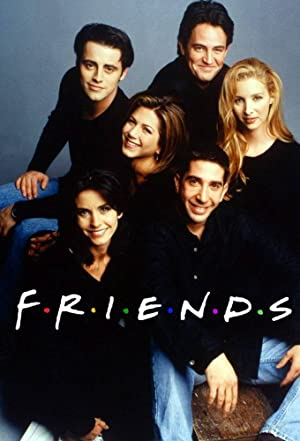

In [57]:
import requests
from PIL import Image

url = client.get(title='Friends')['poster']
response = requests.get(url, stream=True)
Image.open(response.raw)

In [58]:
client.search('Titanic')

[{'title': 'Titanic',
  'year': '1997',
  'imdb_id': 'tt0120338',
  'type': 'movie',
  'poster': 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg'},
 {'title': 'Titanic II',
  'year': '2010',
  'imdb_id': 'tt1640571',
  'type': 'movie',
  'poster': 'https://m.media-amazon.com/images/M/MV5BMTMxMjQ1MjA5Ml5BMl5BanBnXkFtZTcwNjIzNjg1Mw@@._V1_SX300.jpg'},
 {'title': 'Titanic: The Legend Goes On...',
  'year': '2000',
  'imdb_id': 'tt0330994',
  'type': 'movie',
  'poster': 'https://m.media-amazon.com/images/M/MV5BMTg5MjcxODAwMV5BMl5BanBnXkFtZTcwMTk4OTMwMg@@._V1_SX300.jpg'},
 {'title': 'Titanic',
  'year': '1953',
  'imdb_id': 'tt0046435',
  'type': 'movie',
  'poster': 'https://m.media-amazon.com/images/M/MV5BMTU3NTUyMTc3Nl5BMl5BanBnXkFtZTgwOTA2MDE3MTE@._V1_SX300.jpg'},
 {'title': 'Raise the Titanic',
  'year': '1980',
  'imdb_id': 'tt0081400',
  'type': 'movie',
  'poster': 'https://m.media-amazon.com/images/

In [59]:
url = client.get('Titanic II')[0]['poster']

In [60]:
url

'https://m.media-amazon.com/images/M/MV5BMTMxMjQ1MjA5Ml5BMl5BanBnXkFtZTcwNjIzNjg1Mw@@._V1_SX300.jpg'

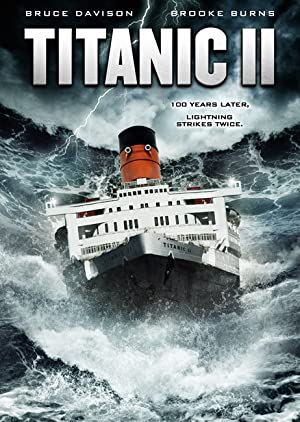

In [61]:
response = requests.get(url, stream=True)
Image.open(response.raw)

## Spotify

Install spotipy: `pip install spotipy`

Read its documentation: https://spotipy.readthedocs.io/en/2.14.0/

If you read the documentation, it tells you to get your `access key` at https://developer.spotify.com/documentation/web-api/. You can view the `quick-start` tab or follow the guidelines here.

- Click on `Dashboard`
- Log in to your Spotify account
- Create an APP
- Collect your `Client ID` and `Client Secret` (click on SHOW CLIENT SECRET)
- Click on `Edit Settings` on your app's dashboard
    - You have to insert a `redirect_uri` (I've put: https://www.google.com. You can put anything.)
- Find your username ID in your profile settings.


- Code Samples: https://github.com/plamere/spotipy/tree/master/examples

In [ ]:
!pip install spotipy

In [ ]:
from spotifypass import client_id,client_secret 

In [62]:
from dotenv import load_dotenv
load_dotenv('keys_api.env')

True

In [63]:
import os
client_id = os.getenv('SPOTIPY_CLIENT_ID')
client_secret = os.getenv('SP_CLIENT_SECRET')


### Authentication 

In [64]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

### Users `current_playing` status

In [46]:
sp.currently_playing()

HTTP Error for GET to https://api.spotify.com/v1/me/player/currently-playing with Params: {'market': None, 'additional_types': None} returned 404 due to Invalid username


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/me/player/currently-playing:
 Invalid username, reason: None

In [ ]:
sp.currently_playing()['item']['album']['images']

### Skip song

In [25]:
sp.next_track()

HTTP Error for POST to https://api.spotify.com/v1/me/player/next returned 403 due to Player command failed: Premium required


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/me/player/next:
 Player command failed: Premium required, reason: PREMIUM_REQUIRED

In [26]:
sp.currently_playing()

HTTP Error for GET to https://api.spotify.com/v1/me/player/currently-playing returned 404 due to Invalid username


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/me/player/currently-playing:
 Invalid username, reason: None

In [27]:
sp.currently_playing().keys()

HTTP Error for GET to https://api.spotify.com/v1/me/player/currently-playing returned 404 due to Invalid username


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/me/player/currently-playing:
 Invalid username, reason: None

In [28]:
sp.currently_playing()['item']['album']['id']

HTTP Error for GET to https://api.spotify.com/v1/me/player/currently-playing returned 404 due to Invalid username


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/me/player/currently-playing:
 Invalid username, reason: None

In [30]:
sp.volume(10)

HTTP Error for PUT to https://api.spotify.com/v1/me/player/volume?volume_percent=10 returned 403 due to Player command failed: Premium required


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/me/player/volume?volume_percent=10:
 Player command failed: Premium required, reason: PREMIUM_REQUIRED

### Get playlist tracks

In [35]:
# playlist
playlist = '0q1VKI0FlEs3o2Ap2nPCs3'

In [36]:
sp.user_playlist_tracks(username, playlist).keys()

NameError: name 'username' is not defined

In [34]:
sp.user_playlist_tracks(username, playlist)['items'][1]['track']['id']

NameError: name 'username' is not defined

In [ ]:
sp.add_to_queue('0Em8m9kRctyH9S3MTXAHvY')
sp.next_track()

In [ ]:
sp.pause_playback()

### Get Audio Features

In [65]:
#https://open.spotify.com/album/60QqGzj16uECZOlApxNixf?si=Z3RARey7TxKw50cYxiQFew&dl_branch=1
#https://open.spotify.com/album/52SWY8s4RmmSB0YnXZUSMi?si=KSYNg1EfSZ2-KHt_LAM1bA
#https://open.spotify.com/album/02Tl6kO2w7U3DMwxGzr6TS?si=GbuomM6QSGij5hz4KP-qIA
sp.album_tracks('02Tl6kO2w7U3DMwxGzr6TS')

{'href': 'https://api.spotify.com/v1/albums/02Tl6kO2w7U3DMwxGzr6TS/tracks?offset=0&limit=50',
 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/20L3gYREq24KddkFreyiNv'},
     'href': 'https://api.spotify.com/v1/artists/20L3gYREq24KddkFreyiNv',
     'id': '20L3gYREq24KddkFreyiNv',
     'name': 'Psirico',
     'type': 'artist',
     'uri': 'spotify:artist:20L3gYREq24KddkFreyiNv'}],
   'available_markets': ['BR'],
   'disc_number': 1,
   'duration_ms': 197080,
   'explicit': False,
   'external_urls': {'spotify': 'https://open.spotify.com/track/466nusIUJceQ5qiuugLuYf'},
   'href': 'https://api.spotify.com/v1/tracks/466nusIUJceQ5qiuugLuYf',
   'id': '466nusIUJceQ5qiuugLuYf',
   'is_local': False,
   'name': 'Lepo Lepo',
   'preview_url': 'https://p.scdn.co/mp3-preview/e58c8383140bf3fa7b1101b0ec2087a6adf67e3b?cid=2cd9cbed41b142aa968a362050ad33a8',
   'track_number': 1,
   'type': 'track',
   'uri': 'spotify:track:466nusIUJceQ5qiuugLuYf'},
  {'artists': [

In [66]:
#https://open.spotify.com/track/1iwv4D5EHcKtJqPprNf8vT?si=vLF-A6sDTsCHt5f9svv9sA
#https://open.spotify.com/track/1tdP9ND6rKEq1vJZlMQ5KW?si=17ca2f08f9b54730
sp.audio_features('466nusIUJceQ5qiuugLuYf')

[{'danceability': 0.714,
  'energy': 0.82,
  'key': 9,
  'loudness': -4.24,
  'mode': 1,
  'speechiness': 0.215,
  'acousticness': 0.398,
  'instrumentalness': 0,
  'liveness': 0.13,
  'valence': 0.874,
  'tempo': 139.981,
  'type': 'audio_features',
  'id': '466nusIUJceQ5qiuugLuYf',
  'uri': 'spotify:track:466nusIUJceQ5qiuugLuYf',
  'track_href': 'https://api.spotify.com/v1/tracks/466nusIUJceQ5qiuugLuYf',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/466nusIUJceQ5qiuugLuYf',
  'duration_ms': 197080,
  'time_signature': 4}]

In [31]:
sp.audio_features('37Tmv4NnfQeb0ZgUC4fOJj')

[{'danceability': 0.733,
  'energy': 0.794,
  'key': 5,
  'loudness': -10.023,
  'mode': 1,
  'speechiness': 0.0307,
  'acousticness': 0.0614,
  'instrumentalness': 0.0367,
  'liveness': 0.33,
  'valence': 0.931,
  'tempo': 148.174,
  'type': 'audio_features',
  'id': '37Tmv4NnfQeb0ZgUC4fOJj',
  'uri': 'spotify:track:37Tmv4NnfQeb0ZgUC4fOJj',
  'track_href': 'https://api.spotify.com/v1/tracks/37Tmv4NnfQeb0ZgUC4fOJj',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/37Tmv4NnfQeb0ZgUC4fOJj',
  'duration_ms': 348624,
  'time_signature': 4}]

In [37]:
sp.audio_features(['37Tmv4NnfQeb0ZgUC4fOJj','6kxwc5gVuazlFo178WoVbF'])

[{'danceability': 0.733,
  'energy': 0.794,
  'key': 5,
  'loudness': -10.023,
  'mode': 1,
  'speechiness': 0.0307,
  'acousticness': 0.0614,
  'instrumentalness': 0.0367,
  'liveness': 0.33,
  'valence': 0.931,
  'tempo': 148.174,
  'type': 'audio_features',
  'id': '37Tmv4NnfQeb0ZgUC4fOJj',
  'uri': 'spotify:track:37Tmv4NnfQeb0ZgUC4fOJj',
  'track_href': 'https://api.spotify.com/v1/tracks/37Tmv4NnfQeb0ZgUC4fOJj',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/37Tmv4NnfQeb0ZgUC4fOJj',
  'duration_ms': 348624,
  'time_signature': 4},
 {'danceability': 0.481,
  'energy': 0.807,
  'key': 4,
  'loudness': -10.447,
  'mode': 1,
  'speechiness': 0.0468,
  'acousticness': 0.0316,
  'instrumentalness': 1.28e-06,
  'liveness': 0.395,
  'valence': 0.463,
  'tempo': 153.821,
  'type': 'audio_features',
  'id': '6kxwc5gVuazlFo178WoVbF',
  'uri': 'spotify:track:6kxwc5gVuazlFo178WoVbF',
  'track_href': 'https://api.spotify.com/v1/tracks/6kxwc5gVuazlFo178WoVbF',
  'analysis_url': 'htt

In [38]:
pd.DataFrame(sp.audio_features(['1pBWfNZ0HQBFbDsFQHtb39','4ebLB7MhWDEq5sxrLwitXy', '198vEZJYqlOtiWw2e1mPmq',
                                     '37Tmv4NnfQeb0ZgUC4fOJj','6kxwc5gVuazlFo178WoVbF']))

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.576,0.887,2,-7.382,1,0.1230,0.2310,0.110000,0.9510,0.607,98.817,audio_features,1pBWfNZ0HQBFbDsFQHtb39,spotify:track:1pBWfNZ0HQBFbDsFQHtb39,https://api.spotify.com/v1/tracks/1pBWfNZ0HQBF...,https://api.spotify.com/v1/audio-analysis/1pBW...,230920,4
1,0.666,0.805,1,-7.396,0,0.2190,0.3620,0.000126,0.0716,0.437,92.631,audio_features,4ebLB7MhWDEq5sxrLwitXy,spotify:track:4ebLB7MhWDEq5sxrLwitXy,https://api.spotify.com/v1/tracks/4ebLB7MhWDEq...,https://api.spotify.com/v1/audio-analysis/4ebL...,275707,4
2,0.662,0.900,4,-4.300,1,0.1070,0.5080,0.000889,0.3450,0.840,135.868,audio_features,198vEZJYqlOtiWw2e1mPmq,spotify:track:198vEZJYqlOtiWw2e1mPmq,https://api.spotify.com/v1/tracks/198vEZJYqlOt...,https://api.spotify.com/v1/audio-analysis/198v...,182693,3
3,0.733,0.794,5,-10.023,1,0.0307,0.0614,0.036700,0.3300,0.931,148.174,audio_features,37Tmv4NnfQeb0ZgUC4fOJj,spotify:track:37Tmv4NnfQeb0ZgUC4fOJj,https://api.spotify.com/v1/tracks/37Tmv4NnfQeb...,https://api.spotify.com/v1/audio-analysis/37Tm...,348624,4
4,0.481,0.807,4,-10.447,1,0.0468,0.0316,0.000001,0.3950,0.463,153.821,audio_features,6kxwc5gVuazlFo178WoVbF,spotify:track:6kxwc5gVuazlFo178WoVbF,https://api.spotify.com/v1/tracks/6kxwc5gVuazl...,https://api.spotify.com/v1/audio-analysis/6kxw...,291387,4


### Get top tracks given artist URI

In [13]:
sp.artist_top_tracks('3Qyjq5eQNKo5tHVmXyhvtB')['tracks']

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Qyjq5eQNKo5tHVmXyhvtB'},
     'href': 'https://api.spotify.com/v1/artists/3Qyjq5eQNKo5tHVmXyhvtB',
     'id': '3Qyjq5eQNKo5tHVmXyhvtB',
     'name': 'Netinho',
     'type': 'artist',
     'uri': 'spotify:artist:3Qyjq5eQNKo5tHVmXyhvtB'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/0Igyv5Qr7kCTrTXHpYlalY'},
   'href': 'https://api.spotify.com/v1/albums/0Igyv5Qr7kCTrTXHpYlalY',
   'id': '0Igyv5Qr7kCTrTXHpYlalY',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273f0eb2cf2e85866fc180fbe40',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/ab67616d00001e02f0eb2cf2e85866fc180fbe40',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/ab67616d00004851f0eb2cf2e85866fc180fbe40',
     'width': 64}],
   'name': 'Total - O Melhor De Netinho',
   'release_date': '1997-01-01',
   'rele

In [14]:
sp.artist_related_artists('3Qyjq5eQNKo5tHVmXyhvtB')

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6NqIUh0cpaygBWUUAjBaog'},
   'followers': {'href': None, 'total': 203424},
   'genres': ['axe', 'pagode', 'samba reggae', 'sertanejo'],
   'href': 'https://api.spotify.com/v1/artists/6NqIUh0cpaygBWUUAjBaog',
   'id': '6NqIUh0cpaygBWUUAjBaog',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab6761610000e5eba5babfc61553187ff95043ff',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/ab67616100005174a5babfc61553187ff95043ff',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/ab6761610000f178a5babfc61553187ff95043ff',
     'width': 160}],
   'name': 'Ara Ketu',
   'popularity': 53,
   'type': 'artist',
   'uri': 'spotify:artist:6NqIUh0cpaygBWUUAjBaog'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/6scgR2PrQGb4TU4MTCQdVK'},
   'followers': {'href': None, 'total': 60869},
   'genres': ['axe', 'pagode', 'samba reggae'],
   'hr

In [15]:
sp.search('onda onda')

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=onda+onda&type=track&offset=0&limit=10',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7iJl63aJyNd8C6NZlMv6kp'},
       'href': 'https://api.spotify.com/v1/artists/7iJl63aJyNd8C6NZlMv6kp',
       'id': '7iJl63aJyNd8C6NZlMv6kp',
       'name': 'Tchakabum',
       'type': 'artist',
       'uri': 'spotify:artist:7iJl63aJyNd8C6NZlMv6kp'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
      'DK',
      'D

In [49]:
sp.search('lexa')

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=lexa&type=track&offset=0&limit=10',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/30F64wQIHvLiFTGaNZ73nU'},
       'href': 'https://api.spotify.com/v1/artists/30F64wQIHvLiFTGaNZ73nU',
       'id': '30F64wQIHvLiFTGaNZ73nU',
       'name': 'Sewerslvt',
       'type': 'artist',
       'uri': 'spotify:artist:30F64wQIHvLiFTGaNZ73nU'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
      'DK',
      'DM',
 

## Twitter API

Install wrapper: `!pip install tweepy`

### Read the docs

- Twitter API: https://developer.twitter.com/en/docs
- Getting started: https://developer.twitter.com/en/docs/basics/getting-started
- Generate an APP
- Get your KEYs and TOKENs

- **READ the tweepy documentation**: http://tweepy.readthedocs.io/

https://developer.twitter.com/en/docs/labs/filtered-stream/quick-start

https://towardsdatascience.com/how-to-access-twitters-api-using-tweepy-5a13a206683b

In [37]:
import tweepy

API_KEY= os.getenv('API_KEY')
API_SECRET=os.getenv('API_SECRET')
ACCESS_TOKEN=os.getenv('ACCESS_TOKEN')
ACCESS_TOKEN_SECRET=os.getenv('ACCESS_TOKEN_SECRET')

auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Verify Credentials

In [47]:
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Error during authentication


### Get user

In [48]:
user = api.get_user('andreaguiarr')

NameError: name 'api' is not defined

In [40]:
type(user)

tweepy.models.User

`user` will be an object. You'll have to learn how to handle it by searching for its methods and attributes.

### ._json

In [ ]:
user._json

### Get user's friends list

In [ ]:
user.friends_count

In [ ]:
friends = user.friends()

### Send a tweet

In [ ]:
comment = '#acertômizeravi #chicletêro #eusôdabahia #cansado #Vamp_s2_Friends #xingandomuito https://www.youtube.com/watch?v=vePc5V4h_kg'
api.update_status(comment)

### Get followers

In [ ]:
followers = api.followers('jairbolsonaro', count=100)

In [ ]:
len(followers)

### My tweets

In [ ]:
timeline = api.home_timeline()
timeline

In [ ]:
for i in range(10):
    print(timeline[i]._json['text'])

### Create friend

In [ ]:
api.create_friendship('dnnetto')

### search for keywords

In [ ]:
posts = api.search(q="ironhack", lang="en", count=100)
len(posts)

In [ ]:
posts[2]._json['text']

In [ ]:
i = 5
print(posts[i]._json['text'])

print(posts[i]._json['entities']['hashtags'])

print(posts[i]._json['user']['name'])

In [ ]:
import re

for post in posts:
    if len(post._json['entities']['hashtags']): 
        if re.search('.*scholarships.*', post._json['entities']['hashtags'][0]['text'], 
                     flags=re.IGNORECASE):
            print(post._json['user']['name'], '-', post._json['user']['location'], post._json['text'], '\n')

### Get user's timeline

In [ ]:
tweets = api.user_timeline(screen_name = 'realDonaldTrump', count=2000)

In [ ]:
tweets[0]._json['text']

----

`!pip install Goodreads`

In [ ]:
from goodreads import client
gc = client.GoodreadsClient(os.getenv('goodreads_key'), 
                            os.getenv('goodreads_secret'))

In [ ]:
book = gc.book(1)
book

In [ ]:
type(book)

In [ ]:
book.average_rating

In [ ]:
book.title

In [ ]:
book.similar_books

In [ ]:
user = gc.user(3)

In [ ]:
user.name

In [ ]:
gc.find_groups("star wars")

## Trello

In [51]:
#pip install py-trello

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Created wheel for py-trello: filename=py_trello-0.18.0-py3-none-any.whl size=39844 sha256=b2d2d4abd3a7034ee426803c22d31a1f8ec134146e67daf523d52801b5845879
  Stored in directory: c:\users\raian\appdata\local\pip\cache\wheels\a0\c5\da\ebfca8b7f8d48448b3034da7366256a8d946e58c2315f3d3f5
Successfully built py-trello
Note: you may need to restart the kernel to use updated packages.


In [52]:
from trello import TrelloClient

client = TrelloClient(
    api_key=os.getenv('trello_key'),
    api_secret=os.getenv('trello_secret'),
    token=os.getenv('trello_token'),
)

In [53]:
client.list_boards()

[<Board (name: Daily Task Management) (id: 5ee79cf40cdebe18b0192ad7) (last_activity: None) (client: <trello.trelloclient.TrelloClient object at 0x000002085C6215B0>) >,
 <Board (name: Geral) (id: 5ee6fba25cac96701144022d) (last_activity: None) (client: <trello.trelloclient.TrelloClient object at 0x000002085C6215B0>) >,
 <Board (name: IronHack Full-Time) (id: 5eee05746178253276eb40d6) (last_activity: None) (client: <trello.trelloclient.TrelloClient object at 0x000002085C6215B0>) >,
 <Board (name: New Board) (id: 5f5691b4f2730102859b19a6) (last_activity: None) (client: <trello.trelloclient.TrelloClient object at 0x000002085C6215B0>) >,
 <Board (name: Teste) (id: 5f53f4764379f033bcad245d) (last_activity: None) (client: <trello.trelloclient.TrelloClient object at 0x000002085C6215B0>) >]

In [54]:
client.search('Parallel')

[<Card Quarta-Feira>]

In [ ]:
from trello.label import Label

In [ ]:
label = Label(client, 1, 'test_label')

In [ ]:
card = client.search('Parallel')[0]

In [ ]:
try:
    [checklist.delete() for checklist in card.checklists]
    print('Deleted')
except:
    print('No checklists to delete')


In [ ]:
card.add_checklist('Test', ['a','b','c'], itemstates=[False, True, False])

In [ ]:
client.add_board('New Board')

# Resumo
* Auxilia na utilização de api, para utilizarmos métodos e atributos ao invés de modificar a url. Pip install nome_do_api_wrapper e utilizar como uma biblioteca, lendo a documentação.
* Escondendo senhas no código:
    - Variavel de ambiente, cria uma variavel de 
        - from dotenv import load_dotenv
        - load_dotenv('arquivo_env.env')
        - import os
        - secret = os.getenv('nome_variavel')
    - De arquivo python, pega de um arquivo python o que pode gerar confusão com outros arquivos 
        - from arquivo_python import secret
    - Arquivo de texto, só aceita uma senha por vez
        - secret = open('untitled.txt','r').read()
    - Biblioteca getpass, pede input da senha
        - import getpass
        - secret=getpass.getpass()

In [ ]:
def generate_coins_df(coins_list):
    '''This function generate general coins data'''
    columns_coins_df = ['id','symbol','name','platforms']
    df_dados=pd.DataFrame(columns=columns_coins_df)
    for id in coins_list:
        df_dados['id']= id['id']
        df_dados['symbol']=id['symbol']
        df_dados['name']=id['name']
        platforms_list=[]
        for x in id['platforms'].keys(): 
            platforms_list.append(x)
        print(id['id'])
        print(platforms_list)
        if len(platforms_list)>1:
            df_dados['platforms']= platforms_list
    return(df_dados)#    

In [ ]:
new_list=[]
for id in coins_list:
    if id['symbol']=='bitcoin':
        for x in id['platforms'].keys(): 
            new_list.append(x)
#        print(id['platforms'])
''.join(new_list)